In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf

In [5]:
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)

In [6]:
df=pd.read_csv('airtrain.csv')

In [7]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [8]:
df.drop('Unnamed: 0',axis=1,inplace = True) 

In [9]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [10]:
df.id.nunique()

103904

In [11]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [12]:
df.rename(columns={'Customer Type':'Customer_Type','Type of Travel':'Type_of_Travel','Flight Distance':'Flight_Distance','Inflight wifi service':'Inflight_wifi_service','Departure/Arrival time convenient':'Departure_Arrival_time_convenient','Ease of Online booking':'Ease_of_Online_booking','Gate location':'Gate_location','Food and drink':'Food_and_drink','Online boarding':'Online_boarding','Seat comfort':'Seat_comfort','Inflight entertainment':'Inflight_entertainment','On-board service':'On_board_service','Leg room service':'Leg_room_service','Baggage handling':'Baggage_handling','Checkin service':'Checkin_service','Inflight service':'Inflight_service','Departure Delay in Minutes':'Departure_Delay_in_Minutes','Arrival Delay in Minutes':'Arrival_Delay_in_Minutes'},inplace=True)

In [13]:
df

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [14]:
# EDA

In [15]:
df.Gender.value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

<AxesSubplot:title={'center':'Gender'}>

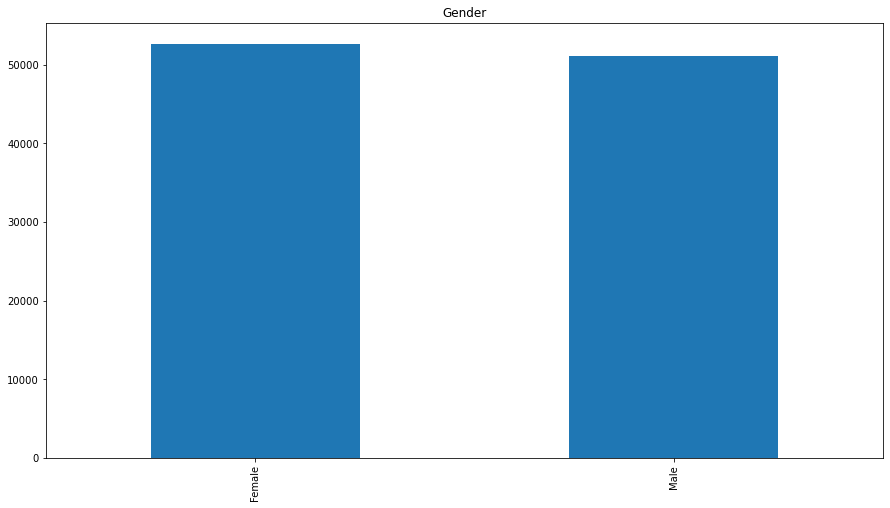

In [16]:
df['Gender'].value_counts().plot(kind='bar',title='Gender')

<AxesSubplot:xlabel='Gender', ylabel='count'>

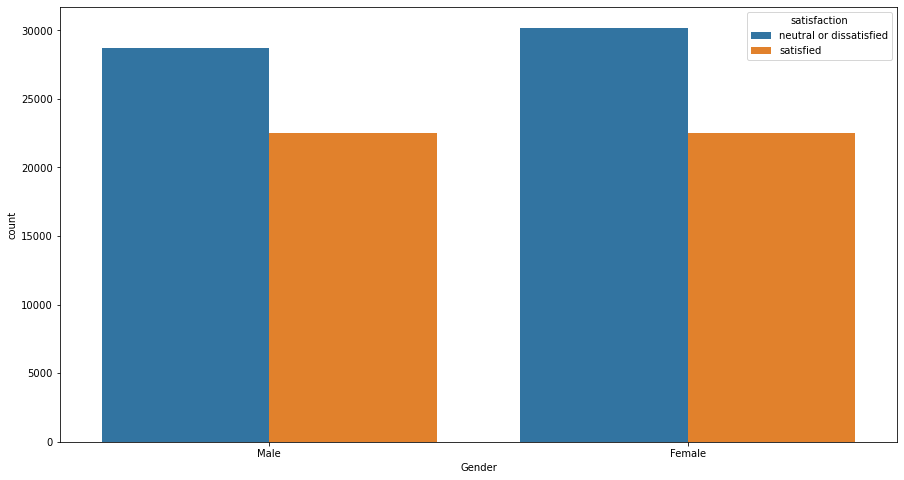

In [17]:
sns.countplot(x='Gender',hue='satisfaction',data=df)

In [18]:
from scipy.stats import chi2_contingency # chi_square Test , for two categorical variables

In [19]:
a=pd.crosstab(index=df.Gender,columns=df.satisfaction)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])   #p_value is < 0.05

satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                          30193      22534
Male                            28686      22491
p value is: 8.496755458033522e-05


In [20]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [21]:
df.Customer_Type.value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer_Type, dtype: int64

<AxesSubplot:title={'center':'Customer_Type'}>

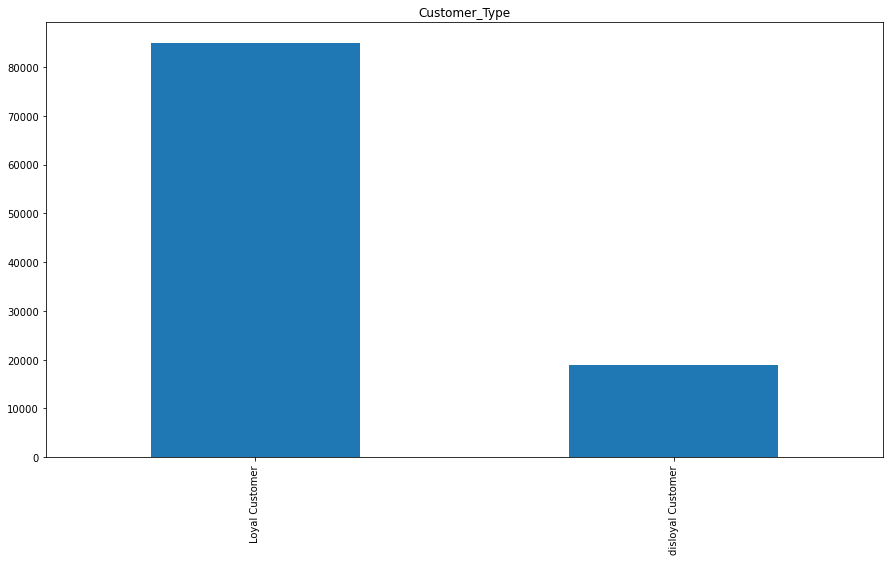

In [22]:
df['Customer_Type'].value_counts().plot(kind='bar',title='Customer_Type')

<AxesSubplot:xlabel='Customer_Type', ylabel='count'>

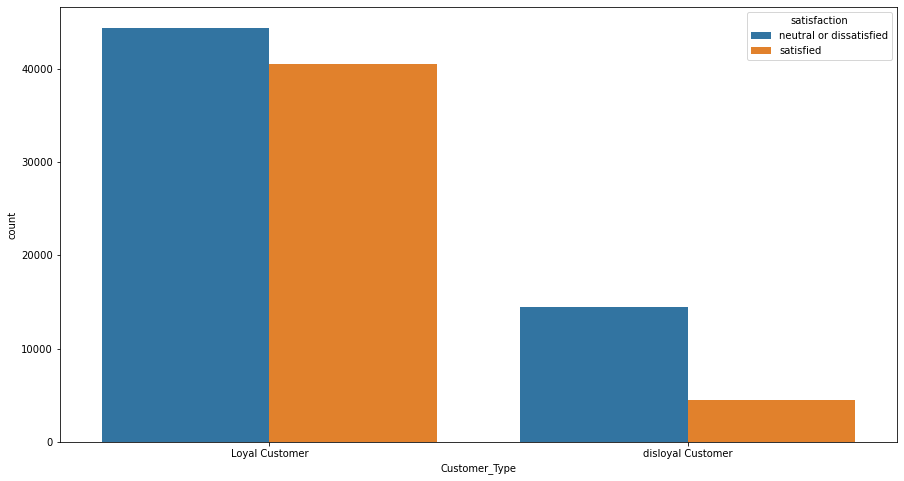

In [23]:
sns.countplot(x='Customer_Type',hue='satisfaction',data=df)

<AxesSubplot:xlabel='Customer_Type', ylabel='count'>

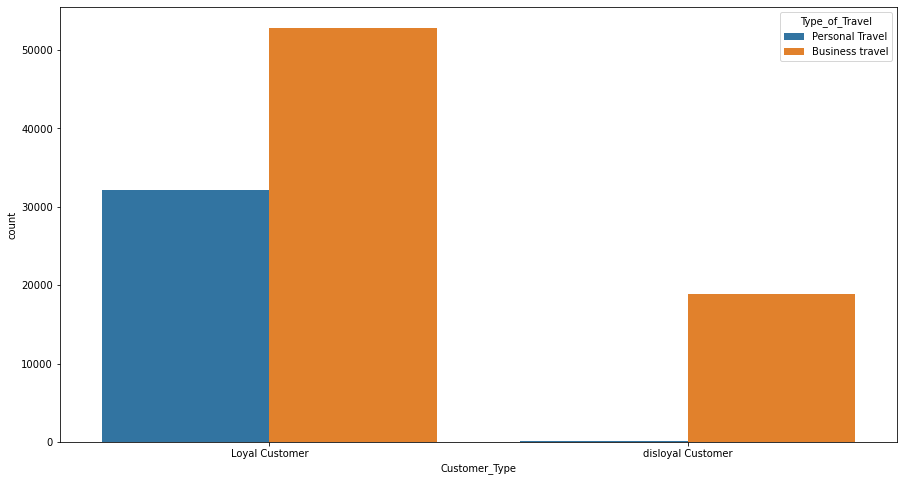

In [24]:
sns.countplot(x='Customer_Type',hue='Type_of_Travel',data=df)

In [25]:
a1=pd.crosstab(index=df.Customer_Type,columns=df.satisfaction)
print(a1)
b1=chi2_contingency(a1)
print('p value is:',b1[1])

satisfaction       neutral or dissatisfied  satisfied
Customer_Type                                        
Loyal Customer                       44390      40533
disloyal Customer                    14489       4492
p value is: 0.0


In [26]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [27]:
df.Age.value_counts()

39    2969
25    2798
40    2574
44    2482
42    2457
      ... 
74      47
76      45
79      42
78      33
85      17
Name: Age, Length: 75, dtype: int64

<AxesSubplot:title={'center':'Age'}>

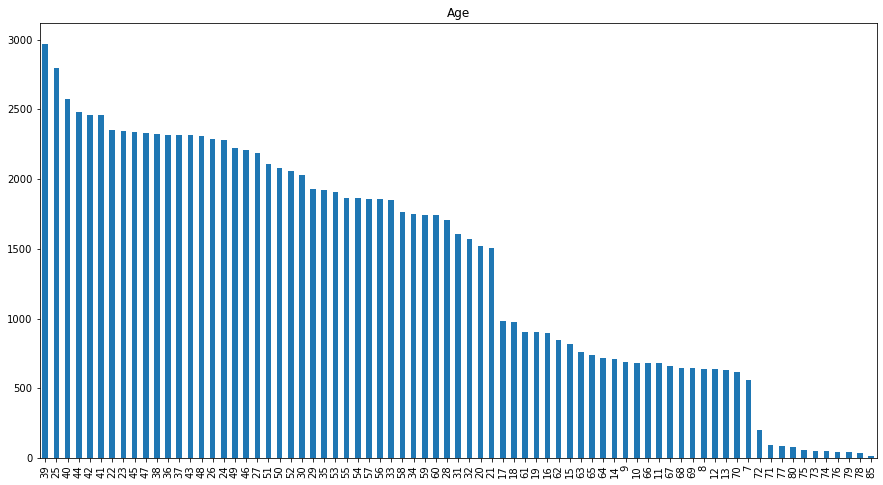

In [28]:
df['Age'].value_counts().plot(kind='bar',title='Age')

(array([ 5230.,  9961., 17566., 15660., 17592., 17221., 13604.,  5697.,
         1203.,   170.]),
 array([ 7. , 14.8, 22.6, 30.4, 38.2, 46. , 53.8, 61.6, 69.4, 77.2, 85. ]),
 <BarContainer object of 10 artists>)

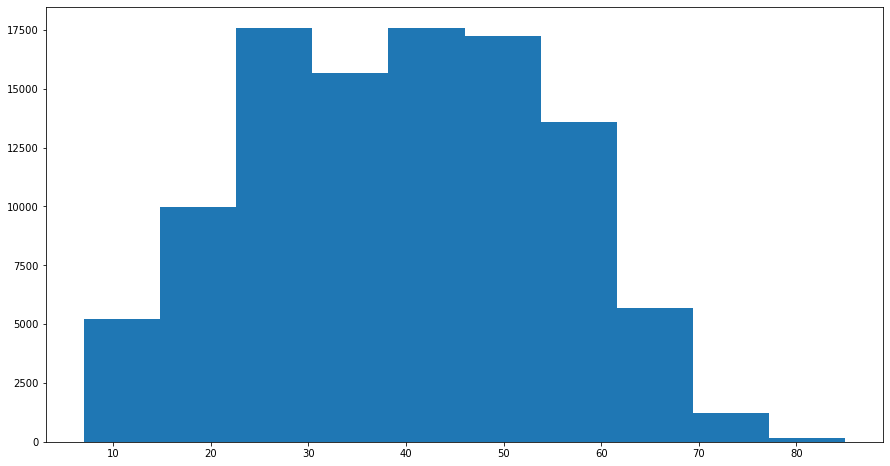

In [29]:
plt.hist(df.Age)

<AxesSubplot:xlabel='Age', ylabel='Density'>

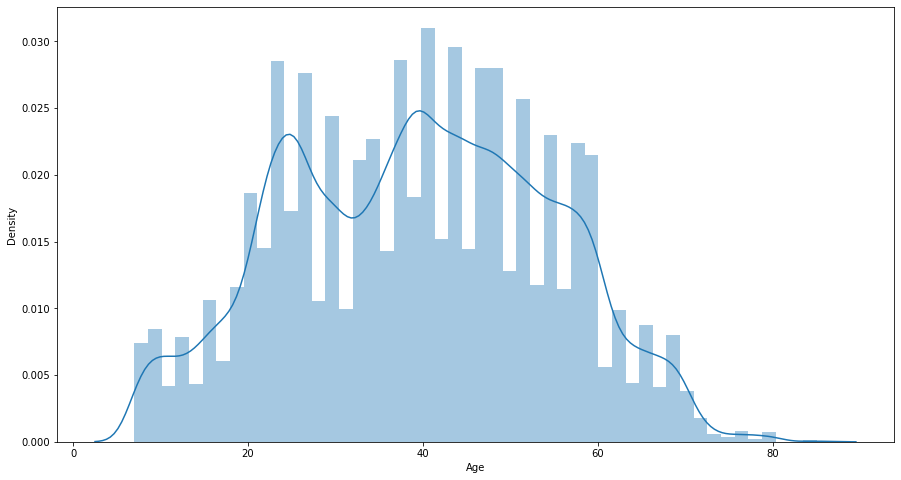

In [30]:
sns.distplot(df.Age)

<AxesSubplot:xlabel='Age'>

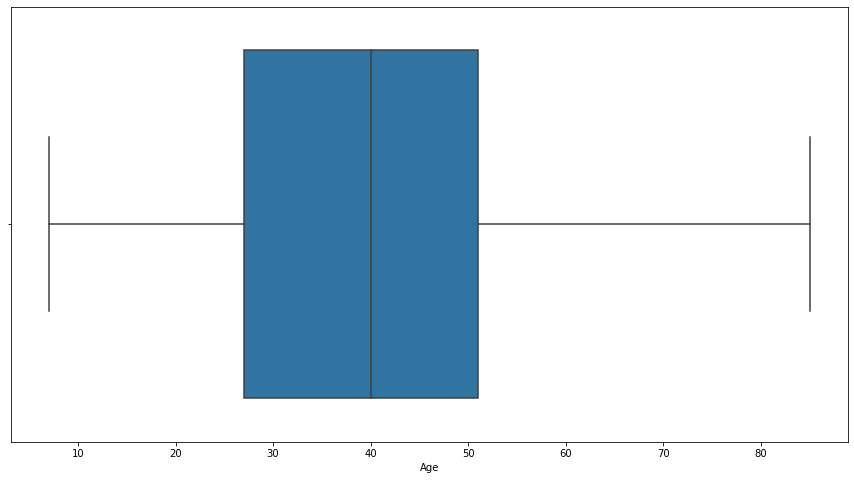

In [31]:
sns.boxplot(df.Age)

In [32]:
m1=ols('Age ~ satisfaction',data=df).fit()
an1=sm.stats.anova_lm(m1)
print(an1)

t1=pairwise_tukeyhsd(df.Age,df.satisfaction,alpha=0.05) # one way anova
print(t1)

                    df        sum_sq        mean_sq            F  PR(>F)
satisfaction       1.0  4.466255e+05  446625.500354  1992.389117     0.0
Residual      103902.0  2.329127e+07     224.165800          NaN     NaN
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
         group1           group2  meandiff p-adj lower  upper  reject
---------------------------------------------------------------------
neutral or dissatisfied satisfied   4.1839 0.001 4.0002 4.3676   True
---------------------------------------------------------------------


In [33]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [34]:
df.Type_of_Travel.value_counts()

Business travel    71655
Personal Travel    32249
Name: Type_of_Travel, dtype: int64

<AxesSubplot:title={'center':'Type_of_Travel'}>

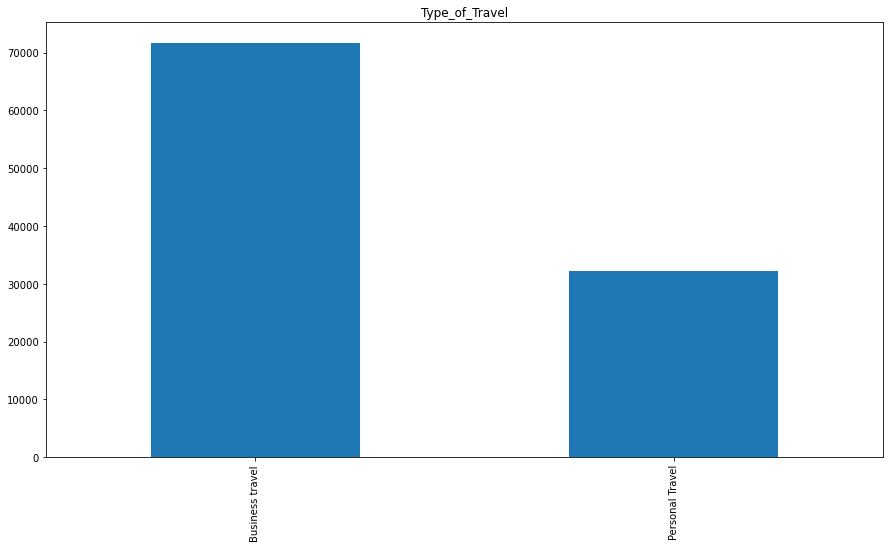

In [35]:
df['Type_of_Travel'].value_counts().plot(kind='bar',title='Type_of_Travel')

<AxesSubplot:xlabel='Type_of_Travel', ylabel='count'>

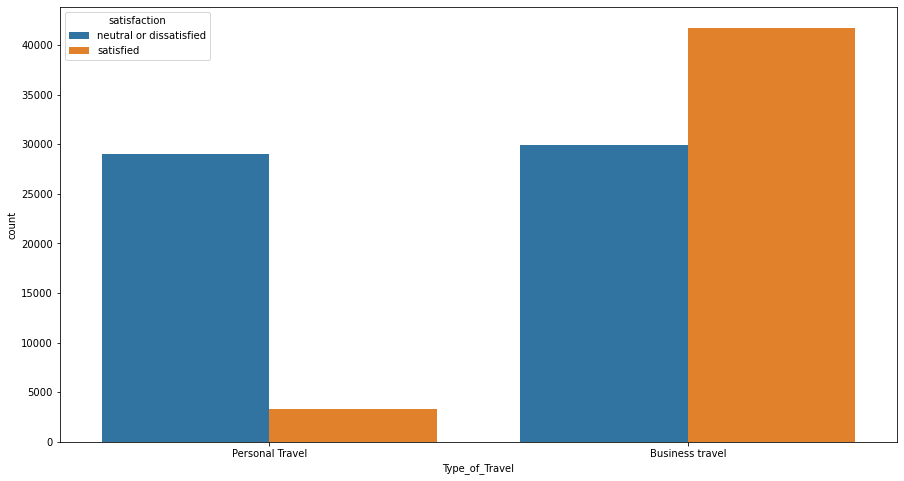

In [36]:
sns.countplot(x='Type_of_Travel',hue='satisfaction',data=df)

In [37]:
a2=pd.crosstab(index=df.Type_of_Travel,columns=df.satisfaction)
print(a2)
b2=chi2_contingency(a2)
print('p value is:',b2[1])

satisfaction     neutral or dissatisfied  satisfied
Type_of_Travel                                     
Business travel                    29909      41746
Personal Travel                    28970       3279
p value is: 0.0


In [38]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [39]:
df.Class.value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

<AxesSubplot:title={'center':'Class'}>

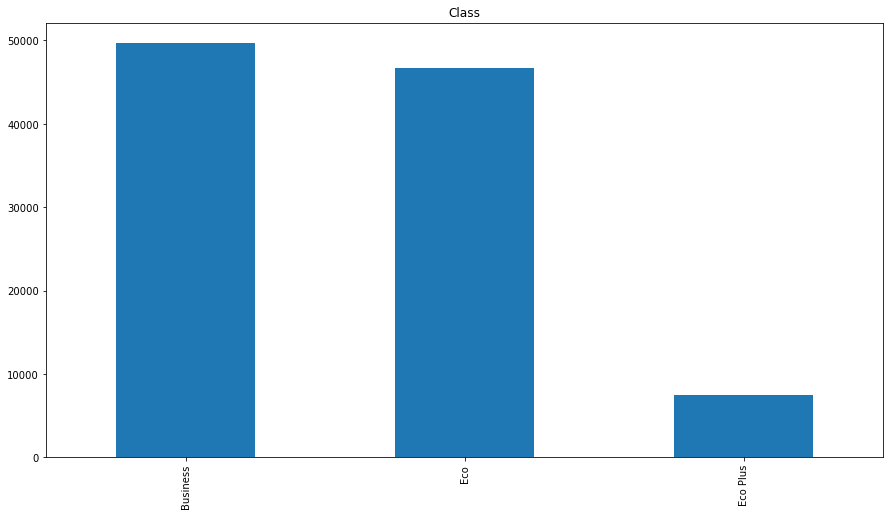

In [40]:
df['Class'].value_counts().plot(kind='bar',title='Class')

<AxesSubplot:xlabel='Class', ylabel='count'>

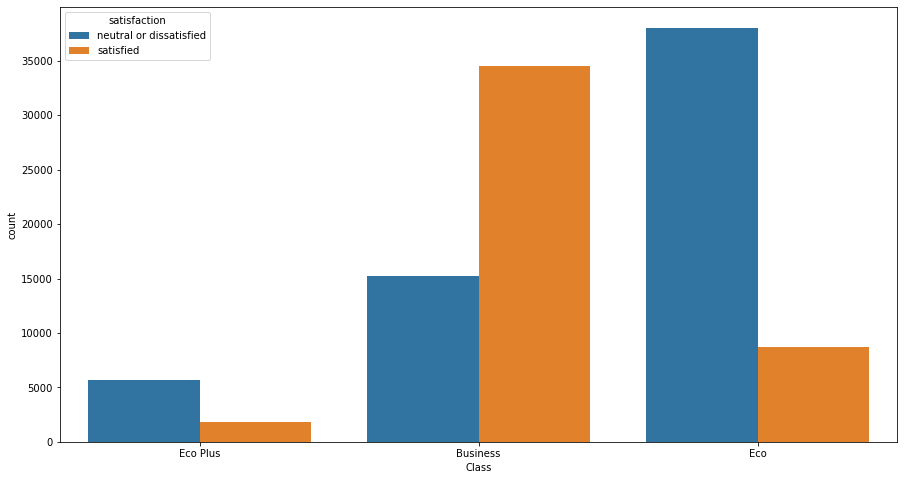

In [41]:
sns.countplot(x='Class',hue='satisfaction',data=df)

In [42]:
a3=pd.crosstab(index=df.Class,columns=df.satisfaction)
print(a3)
b3=chi2_contingency(a3)
print('p value is:',b3[1])

satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                        15185      34480
Eco                             38044       8701
Eco Plus                         5650       1844
p value is: 0.0


In [43]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [44]:
df.Flight_Distance.value_counts()

337     660
594     395
404     392
2475    369
862     369
       ... 
1466      1
856       1
810       1
1361      1
3763      1
Name: Flight_Distance, Length: 3802, dtype: int64

(array([33808., 27400., 11662.,  9715.,  7601.,  5468.,  4015.,  4111.,
           84.,    40.]),
 array([  31. ,  526.2, 1021.4, 1516.6, 2011.8, 2507. , 3002.2, 3497.4,
        3992.6, 4487.8, 4983. ]),
 <BarContainer object of 10 artists>)

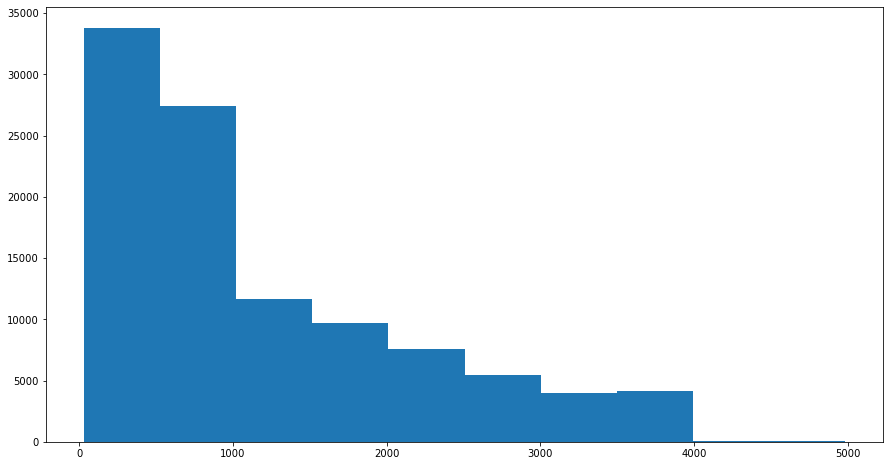

In [45]:
plt.hist(df.Flight_Distance)

In [46]:
df.Flight_Distance.describe()

count    103904.000000
mean       1189.448375
std         997.147281
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        4983.000000
Name: Flight_Distance, dtype: float64

<AxesSubplot:xlabel='Flight_Distance', ylabel='Density'>

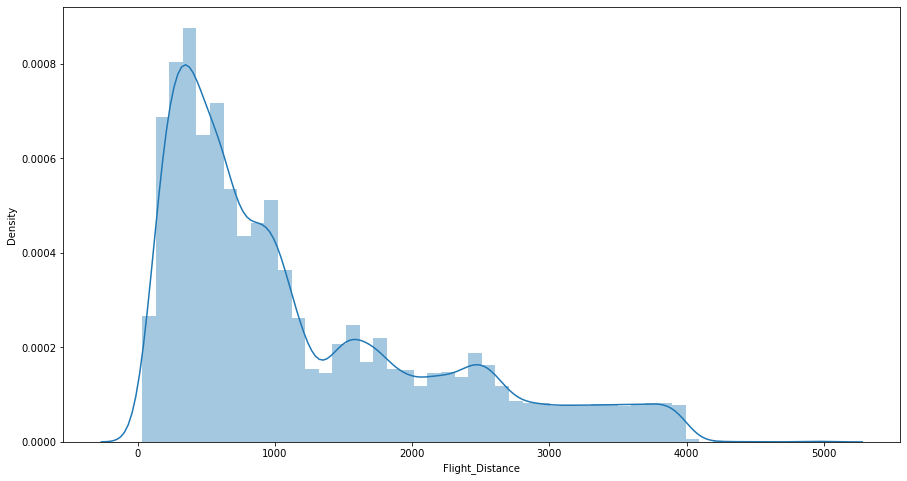

In [47]:
sns.distplot(df.Flight_Distance)

<AxesSubplot:xlabel='Flight_Distance'>

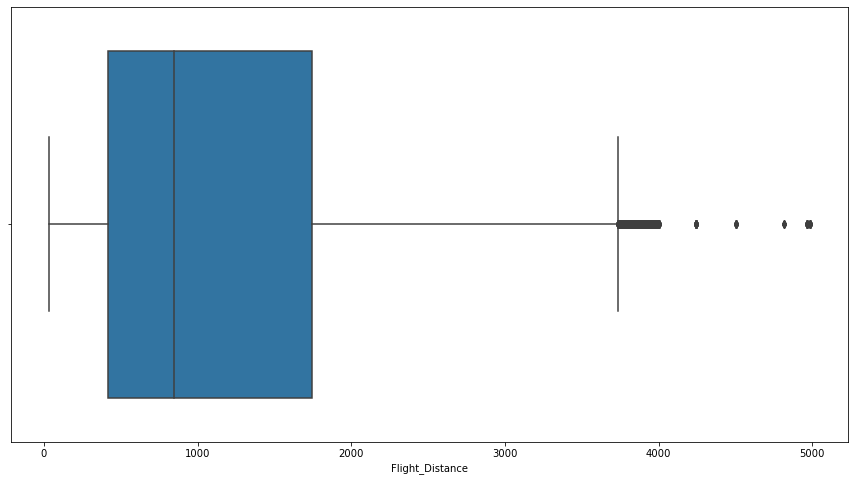

In [48]:
sns.boxplot(df.Flight_Distance)

In [49]:
IQR=df.Flight_Distance.quantile(0.75)-df.Flight_Distance.quantile(0.25)
IQR

1329.0

In [50]:
upper_limit=df.Flight_Distance.quantile(0.75)+(1.5*IQR)
upper_limit

3736.5

In [51]:
len(df.Flight_Distance[df.Flight_Distance>3736.5])


2291

In [52]:
df=df[df['Flight_Distance']<=4200]

In [53]:
m2=ols('Flight_Distance ~ satisfaction',data=df).fit()
an2=sm.stats.anova_lm(m2)
print(an2)

t2=pairwise_tukeyhsd(df.Flight_Distance,df.satisfaction,alpha=0.05) # one way anova
print(t2)

                    df        sum_sq       mean_sq             F  PR(>F)
satisfaction       1.0  9.199668e+09  9.199668e+09  10227.301597     0.0
Residual      103844.0  9.340981e+10  8.995205e+05           NaN     NaN
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
         group1           group2  meandiff p-adj  lower    upper   reject
-------------------------------------------------------------------------
neutral or dissatisfied satisfied 600.6537 0.001 589.0126 612.2949   True
-------------------------------------------------------------------------


In [54]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [55]:
df.Inflight_wifi_service.value_counts()

3    25854
2    25813
4    19781
1    17834
5    11464
0     3100
Name: Inflight_wifi_service, dtype: int64

<AxesSubplot:title={'center':'Inflight_wifi_service'}>

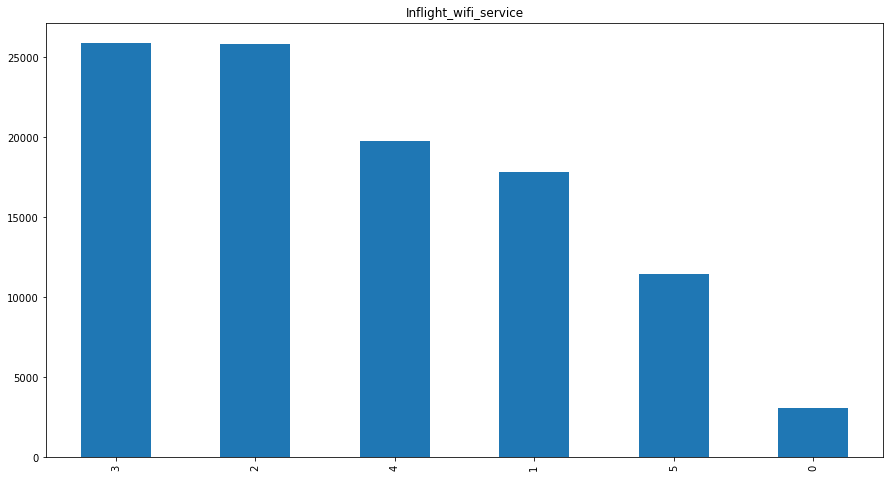

In [56]:
df['Inflight_wifi_service'].value_counts().plot(kind='bar',title='Inflight_wifi_service')

<AxesSubplot:xlabel='Inflight_wifi_service', ylabel='count'>

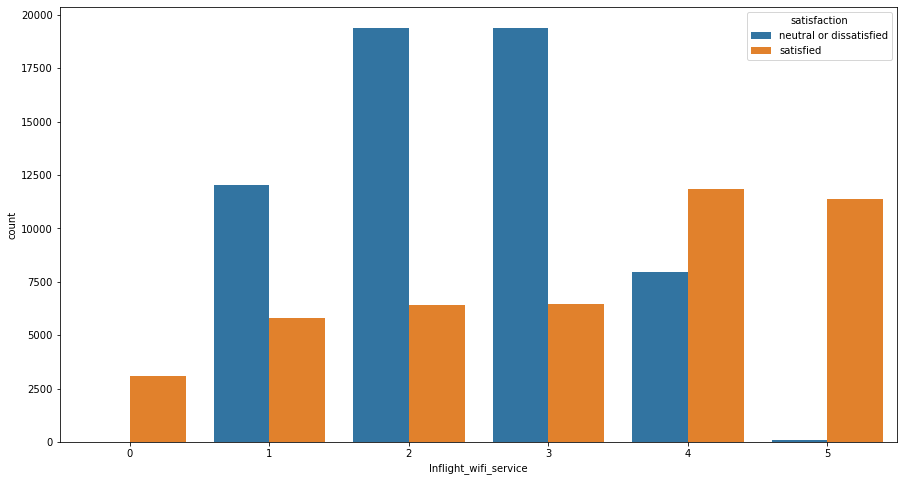

In [57]:
sns.countplot(x='Inflight_wifi_service',hue='satisfaction',data=df)

In [58]:
a4=pd.crosstab(index=df.Inflight_wifi_service,columns=df.satisfaction)
print(a4)
b4=chi2_contingency(a4)
print('p value is:',b4[1])

satisfaction           neutral or dissatisfied  satisfied
Inflight_wifi_service                                    
0                                            8       3092
1                                        12031       5803
2                                        19395       6418
3                                        19378       6476
4                                         7935      11846
5                                          106      11358
p value is: 0.0


In [59]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [60]:
df.Departure_Arrival_time_convenient.value_counts()

4    25533
5    22393
3    17958
2    17175
1    15490
0     5297
Name: Departure_Arrival_time_convenient, dtype: int64

<AxesSubplot:title={'center':'Departure_Arrival_time_convenient'}>

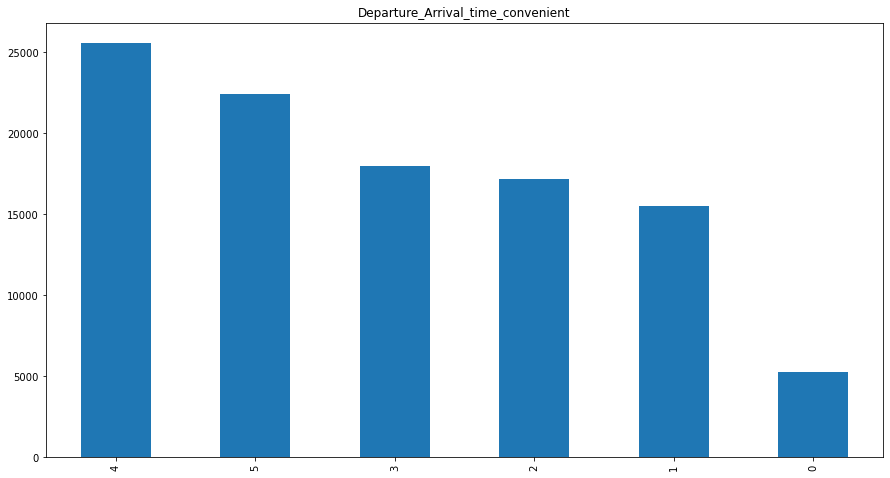

In [61]:
df['Departure_Arrival_time_convenient'].value_counts().plot(kind='bar',title='Departure_Arrival_time_convenient')

<AxesSubplot:xlabel='Departure_Arrival_time_convenient', ylabel='count'>

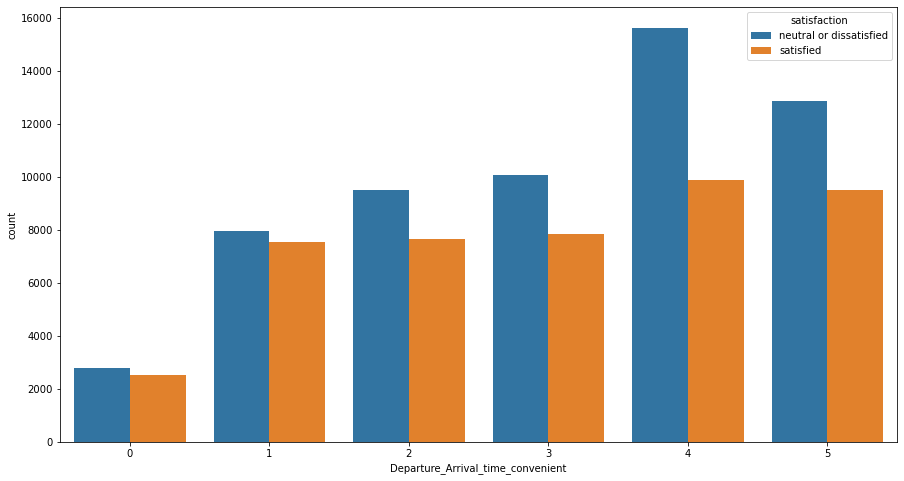

In [62]:
sns.countplot(x='Departure_Arrival_time_convenient',hue='satisfaction',data=df)

In [63]:
a5=pd.crosstab(index=df.Departure_Arrival_time_convenient,columns=df.satisfaction)
print(a5)
b5=chi2_contingency(a5)
print('p value is:',b5[1])

satisfaction                       neutral or dissatisfied  satisfied
Departure_Arrival_time_convenient                                    
0                                                     2779       2518
1                                                     7952       7538
2                                                     9524       7651
3                                                    10091       7867
4                                                    15636       9897
5                                                    12871       9522
p value is: 1.3298705772726047e-95


In [64]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [65]:
df.Ease_of_Online_booking.value_counts()

3    24437
2    24004
4    19563
1    17518
5    13840
0     4484
Name: Ease_of_Online_booking, dtype: int64

<AxesSubplot:title={'center':'Ease_of_Online_booking'}>

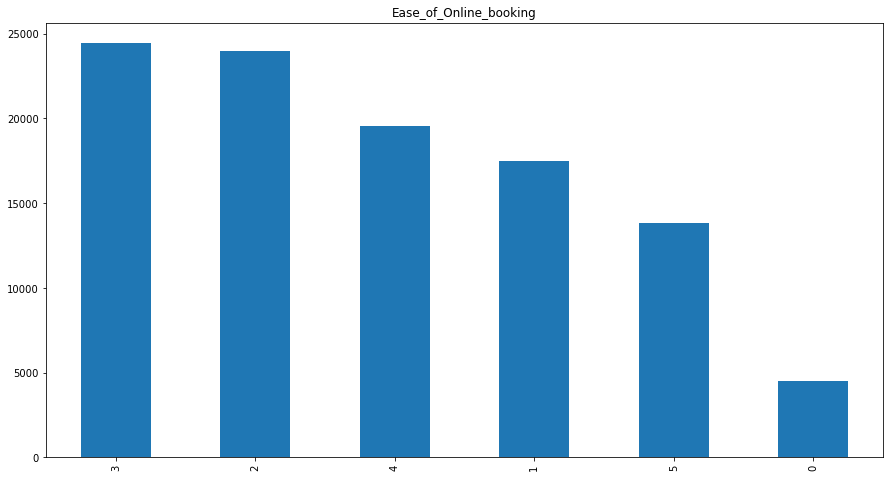

In [66]:
df['Ease_of_Online_booking'].value_counts().plot(kind='bar',title='Ease_of_Online_booking')

<AxesSubplot:xlabel='Ease_of_Online_booking', ylabel='count'>

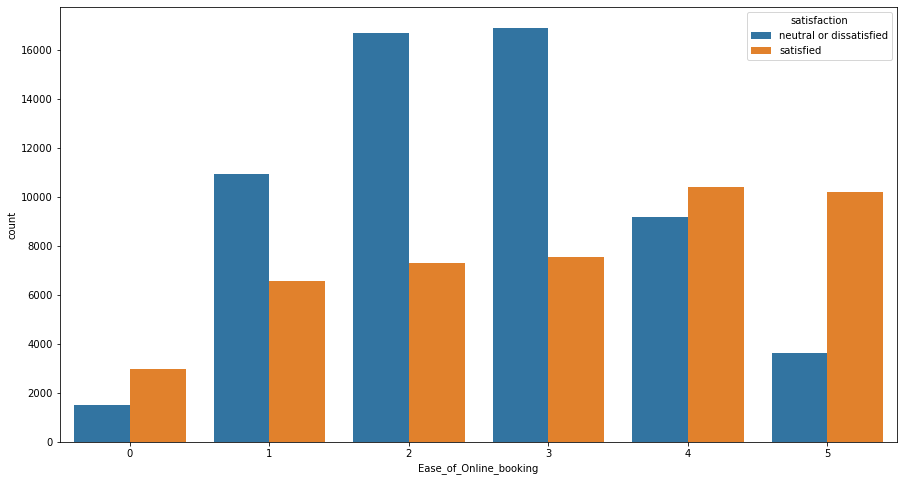

In [67]:
sns.countplot(x='Ease_of_Online_booking',hue='satisfaction',data=df)

In [68]:
a6=pd.crosstab(index=df.Ease_of_Online_booking,columns=df.satisfaction)
print(a6)
b6=chi2_contingency(a6)
print('p value is:',b6[1])

satisfaction            neutral or dissatisfied  satisfied
Ease_of_Online_booking                                    
0                                          1507       2977
1                                         10931       6587
2                                         16709       7295
3                                         16905       7532
4                                          9179      10384
5                                          3622      10218
p value is: 0.0


In [69]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [70]:
df.Inflight_entertainment.value_counts()

4    29415
5    25200
3    19118
2    17625
1    12474
0       14
Name: Inflight_entertainment, dtype: int64

<AxesSubplot:title={'center':'Inflight_entertainment'}>

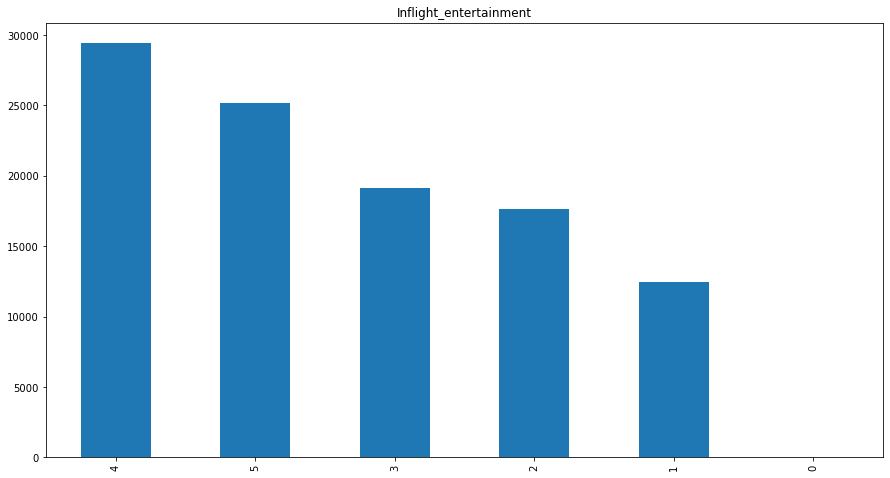

In [71]:
df['Inflight_entertainment'].value_counts().plot(kind='bar',title='Inflight_entertainment')

<AxesSubplot:xlabel='Inflight_entertainment', ylabel='count'>

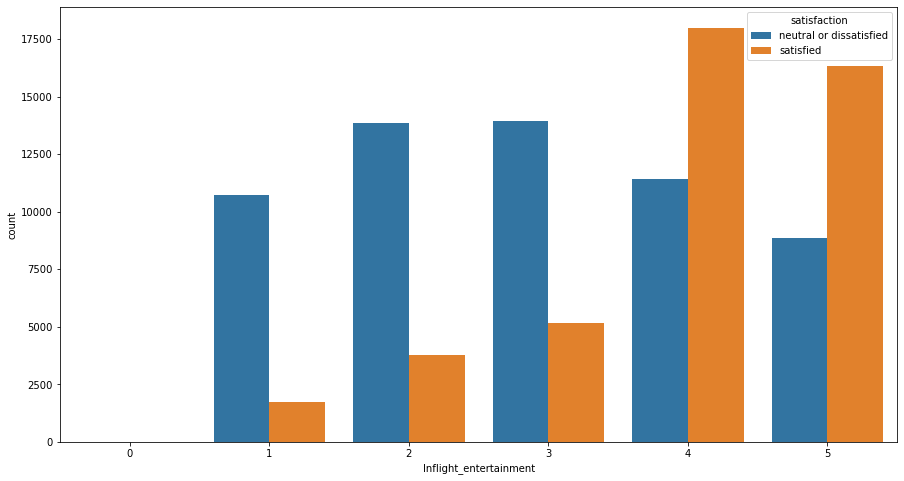

In [72]:
sns.countplot(x='Inflight_entertainment',hue='satisfaction',data=df)

In [73]:
a7=pd.crosstab(index=df.Inflight_entertainment,columns=df.satisfaction)
print(a7)
b7=chi2_contingency(a7)
print('p value is:',b7[1])

satisfaction            neutral or dissatisfied  satisfied
Inflight_entertainment                                    
0                                            14          0
1                                         10730       1744
2                                         13864       3761
3                                         13963       5155
4                                         11420      17995
5                                          8862      16338
p value is: 0.0


In [74]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [75]:
df.isna().sum()

id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure_Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On_board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                           0
dtype: int64

In [76]:
df.Gate_location.value_counts()

3    28562
4    24412
2    19450
1    17553
5    13868
0        1
Name: Gate_location, dtype: int64

<AxesSubplot:title={'center':'Gate_location'}>

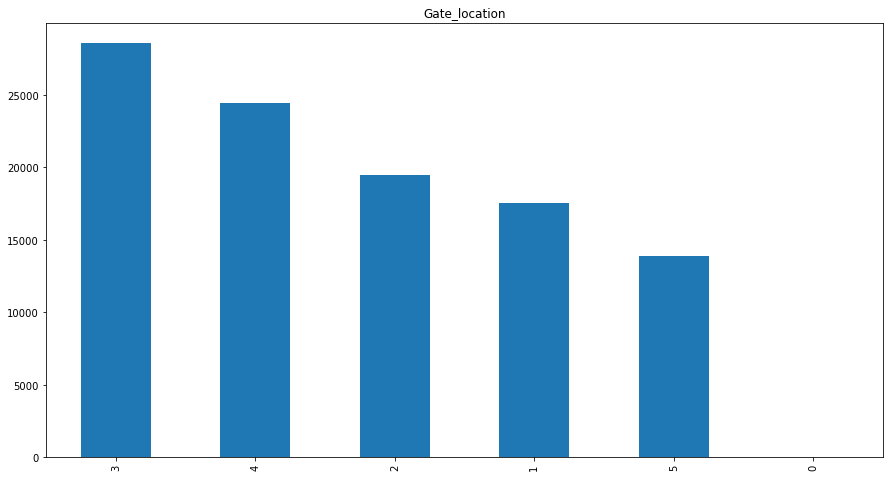

In [77]:
df['Gate_location'].value_counts().plot(kind='bar',title='Gate_location')

<AxesSubplot:xlabel='Gate_location', ylabel='count'>

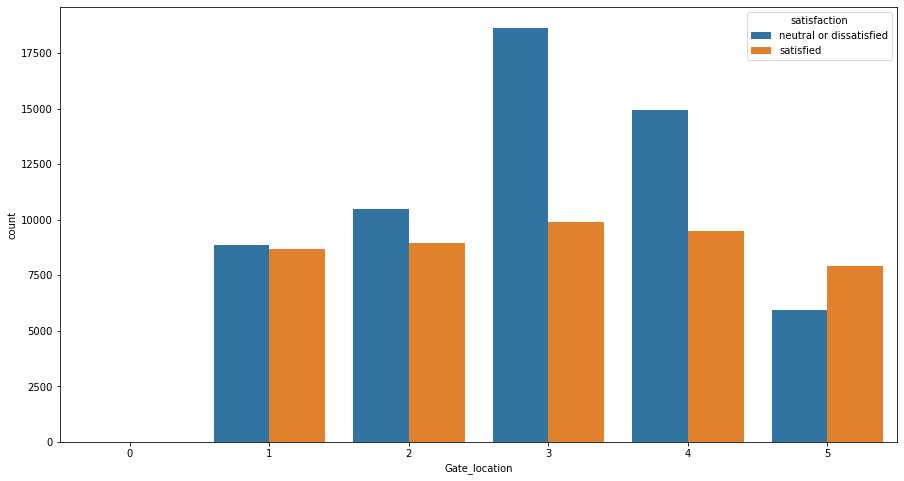

In [78]:
sns.countplot(x='Gate_location',hue='satisfaction',data=df)

In [79]:
a8=pd.crosstab(index=df.Gate_location,columns=df.satisfaction)
print(a8)
b8=chi2_contingency(a8)
print('p value is:',b8[1])

satisfaction   neutral or dissatisfied  satisfied
Gate_location                                    
0                                    0          1
1                                 8855       8698
2                                10492       8958
3                                18647       9915
4                                14930       9482
5                                 5929       7939
p value is: 0.0


In [80]:
df.Food_and_drink.value_counts()

4    24343
5    22303
3    22288
2    21974
1    12834
0      104
Name: Food_and_drink, dtype: int64

<AxesSubplot:title={'center':'Food_and_drink'}>

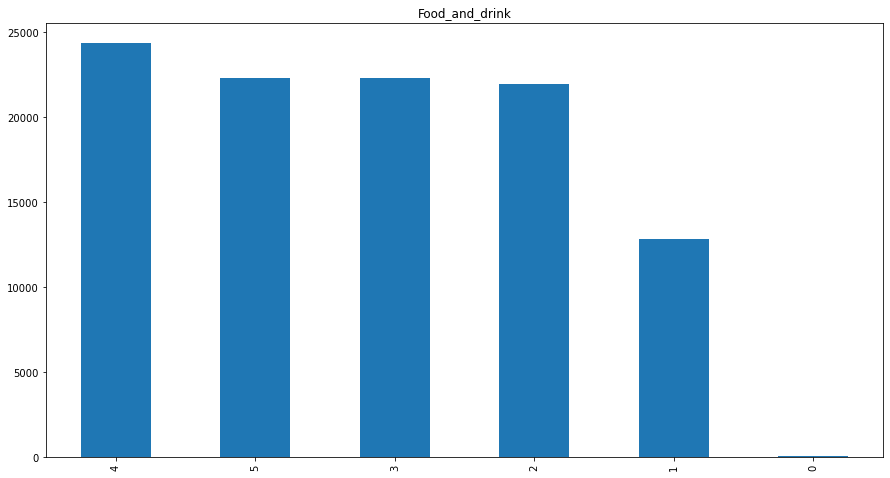

In [81]:
df['Food_and_drink'].value_counts().plot(kind='bar',title='Food_and_drink')

<AxesSubplot:xlabel='Food_and_drink', ylabel='count'>

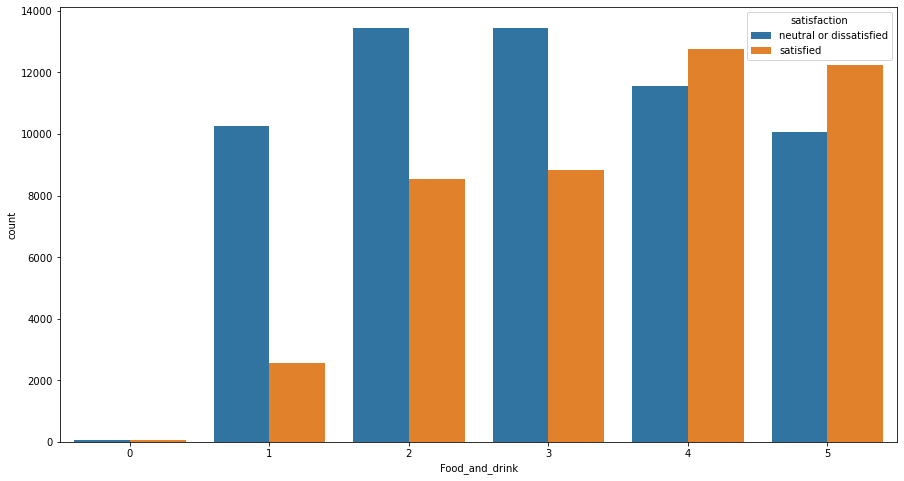

In [82]:
sns.countplot(x='Food_and_drink',hue='satisfaction',data=df)

In [83]:
a9=pd.crosstab(index=df.Food_and_drink,columns=df.satisfaction)
print(a9)
b9=chi2_contingency(a9)
print('p value is:',b9[1])

satisfaction    neutral or dissatisfied  satisfied
Food_and_drink                                    
0                                    57         47
1                                 10266       2568
2                                 13447       8527
3                                 13451       8837
4                                 11571      12772
5                                 10061      12242
p value is: 0.0


In [84]:
df.Online_boarding.value_counts()

4    30742
3    21794
5    20702
2    17498
1    10682
0     2428
Name: Online_boarding, dtype: int64

<AxesSubplot:title={'center':'Online_boarding'}>

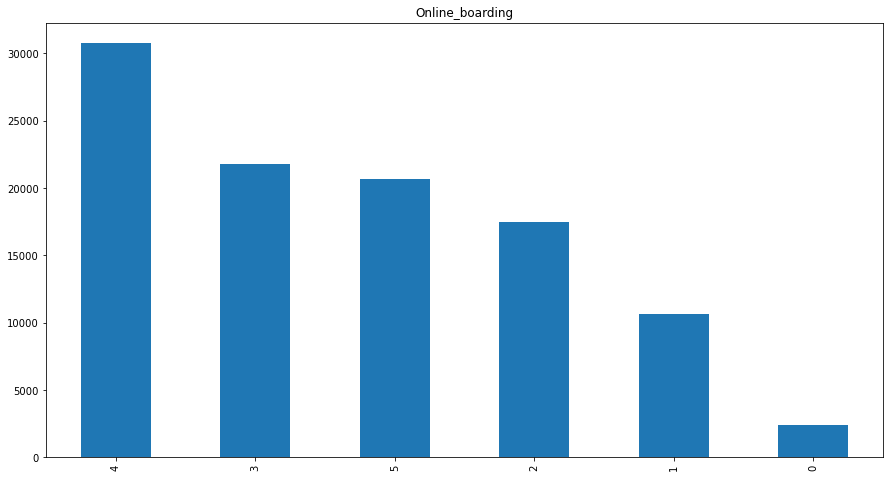

In [85]:
df['Online_boarding'].value_counts().plot(kind='bar',title='Online_boarding')

<AxesSubplot:xlabel='Online_boarding', ylabel='count'>

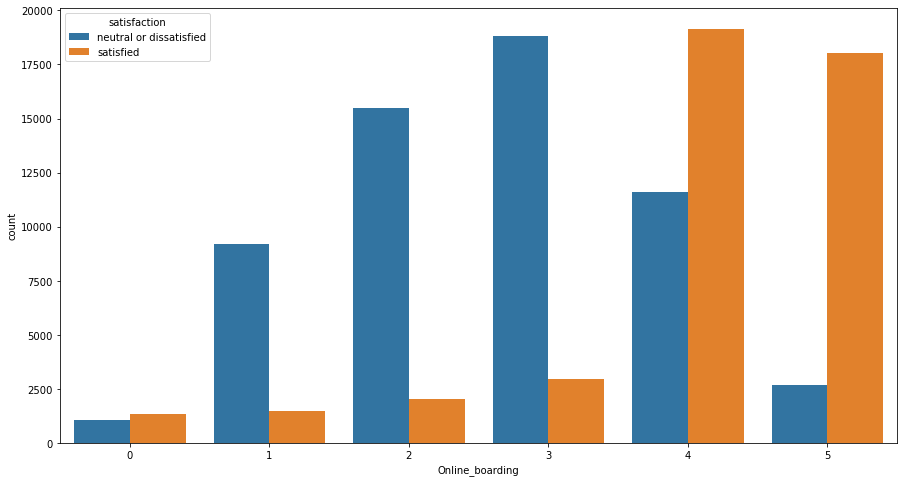

In [86]:
sns.countplot(x='Online_boarding',hue='satisfaction',data=df)

In [87]:
a10=pd.crosstab(index=df.Online_boarding,columns=df.satisfaction)
print(a10)
b10=chi2_contingency(a10)
print('p value is:',b10[1])

satisfaction     neutral or dissatisfied  satisfied
Online_boarding                                    
0                                   1077       1351
1                                   9214       1468
2                                  15481       2017
3                                  18837       2957
4                                  11590      19152
5                                   2654      18048
p value is: 0.0


In [88]:
df.Seat_comfort.value_counts()

4    31744
5    26459
3    18686
2    14889
1    12067
0        1
Name: Seat_comfort, dtype: int64

<AxesSubplot:title={'center':'Seat_comfort'}>

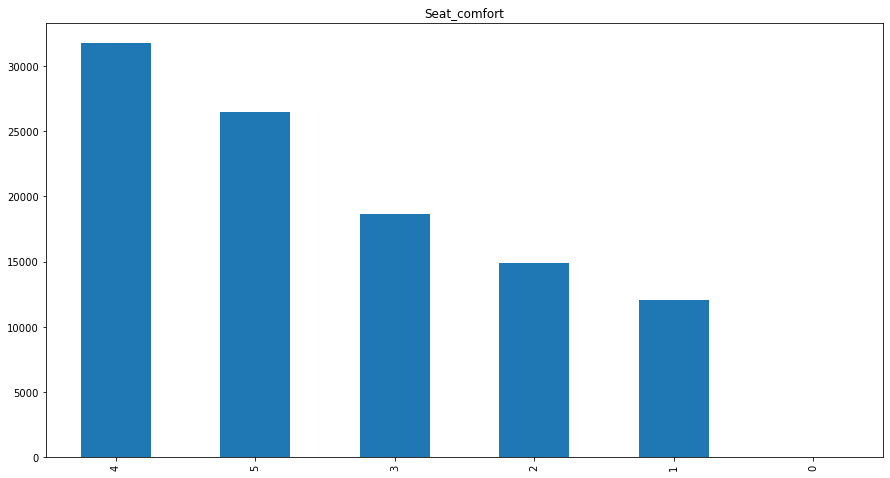

In [89]:
df['Seat_comfort'].value_counts().plot(kind='bar',title='Seat_comfort')

<AxesSubplot:xlabel='Seat_comfort', ylabel='count'>

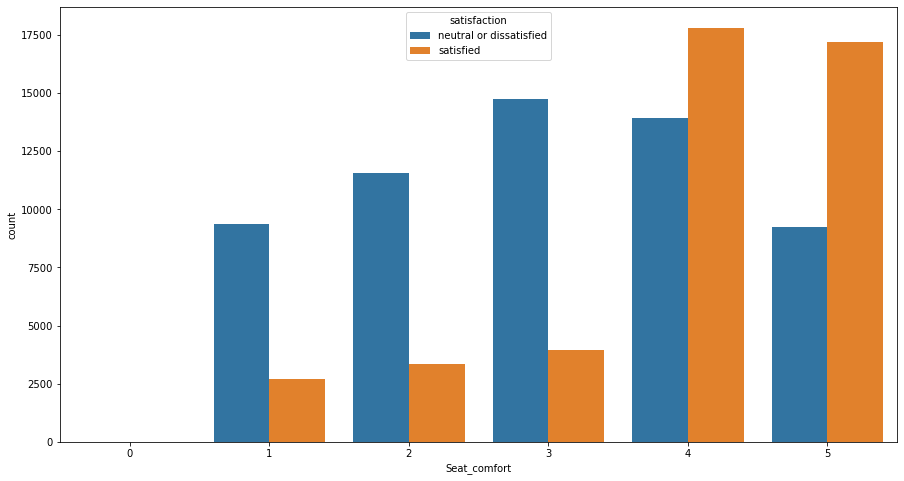

In [90]:
sns.countplot(x='Seat_comfort',hue='satisfaction',data=df)

In [91]:
a11=pd.crosstab(index=df.Seat_comfort,columns=df.satisfaction)
print(a11)
b11=chi2_contingency(a11)
print('p value is:',b11[1])

satisfaction  neutral or dissatisfied  satisfied
Seat_comfort                                    
0                                   1          0
1                                9377       2690
2                               11553       3336
3                               14733       3953
4                               13933      17811
5                                9256      17203
p value is: 0.0


In [92]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [93]:
df.On_board_service.value_counts()

4    30852
5    23639
3    22822
2    14666
1    11864
0        3
Name: On_board_service, dtype: int64

<AxesSubplot:title={'center':'On_board_service'}>

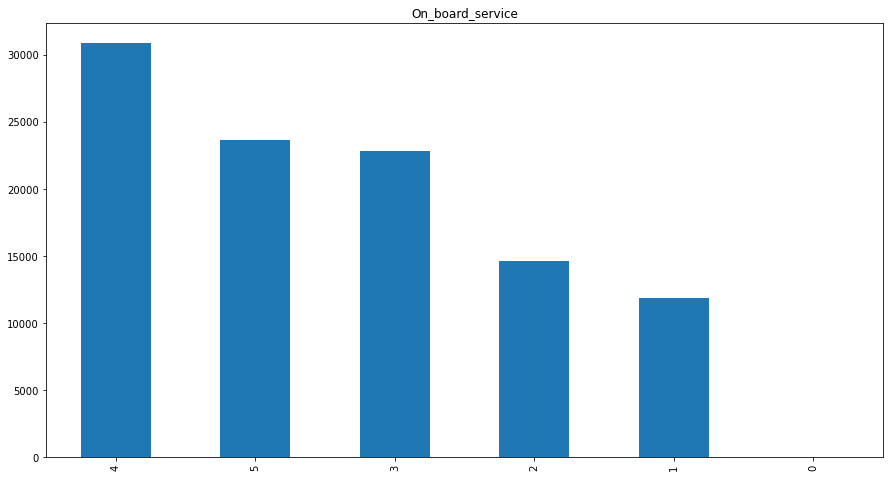

In [94]:
df['On_board_service'].value_counts().plot(kind='bar',title='On_board_service')

<AxesSubplot:xlabel='On_board_service', ylabel='count'>

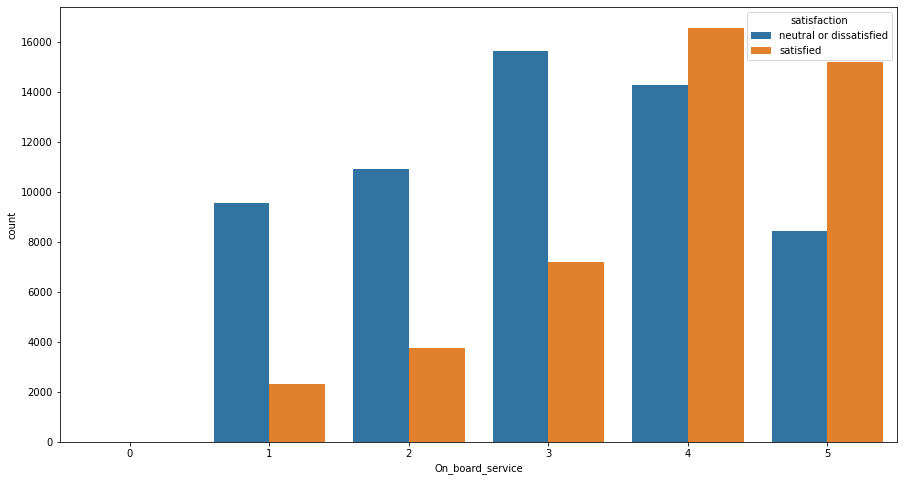

In [95]:
sns.countplot(x='On_board_service',hue='satisfaction',data=df)

In [96]:
a12=pd.crosstab(index=df.On_board_service,columns=df.satisfaction)
print(a12)
b12=chi2_contingency(a12)
print('p value is:',b12[1])

satisfaction      neutral or dissatisfied  satisfied
On_board_service                                    
0                                       3          0
1                                    9566       2298
2                                   10922       3744
3                                   15620       7202
4                                   14289      16563
5                                    8453      15186
p value is: 0.0


In [97]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [98]:
df.Leg_room_service.value_counts()

4    28768
5    24653
3    20080
2    19523
1    10350
0      472
Name: Leg_room_service, dtype: int64

<AxesSubplot:title={'center':'Leg_room_service'}>

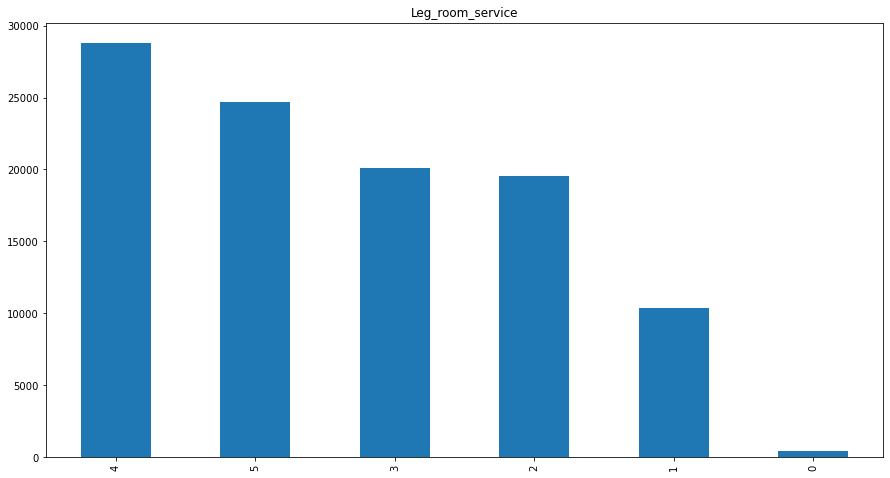

In [99]:
df['Leg_room_service'].value_counts().plot(kind='bar',title='Leg_room_service')


<AxesSubplot:xlabel='Leg_room_service', ylabel='count'>

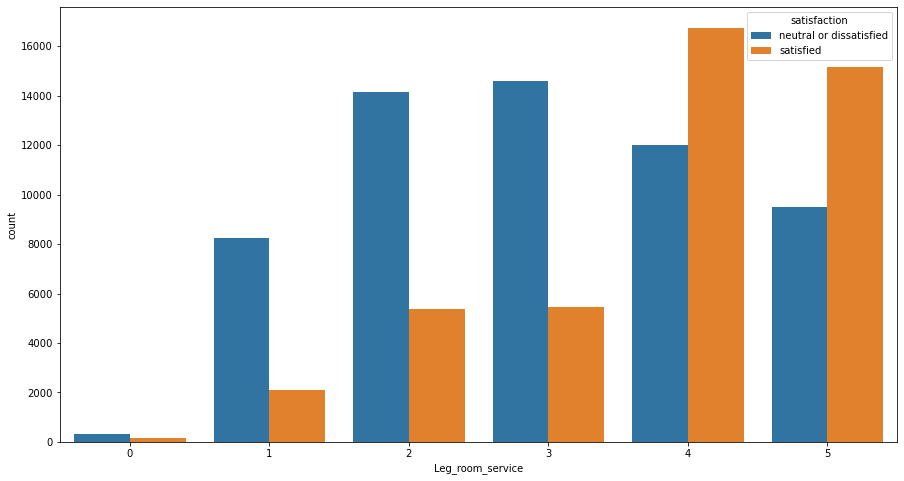

In [100]:
sns.countplot(x='Leg_room_service',hue='satisfaction',data=df)

In [101]:
a12=pd.crosstab(index=df.Leg_room_service,columns=df.satisfaction)
print(a12)
b12=chi2_contingency(a12)
print('p value is:',b12[1])

satisfaction      neutral or dissatisfied  satisfied
Leg_room_service                                    
0                                     306        166
1                                    8251       2099
2                                   14160       5363
3                                   14613       5467
4                                   12017      16751
5                                    9506      15147
p value is: 0.0


In [102]:
df.Baggage_handling.value_counts()

4    37366
5    27110
3    20621
2    11516
1     7233
Name: Baggage_handling, dtype: int64

<AxesSubplot:title={'center':'Baggage_handling'}>

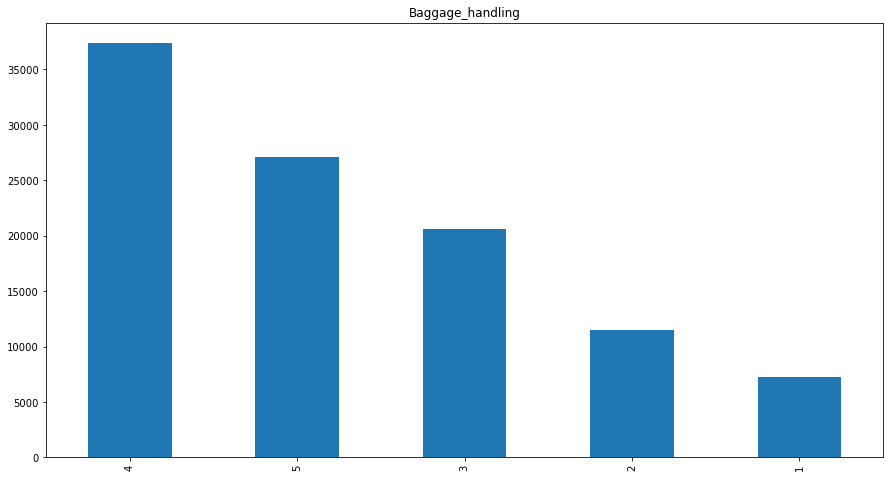

In [103]:
df['Baggage_handling'].value_counts().plot(kind='bar',title='Baggage_handling')


<AxesSubplot:xlabel='Baggage_handling', ylabel='count'>

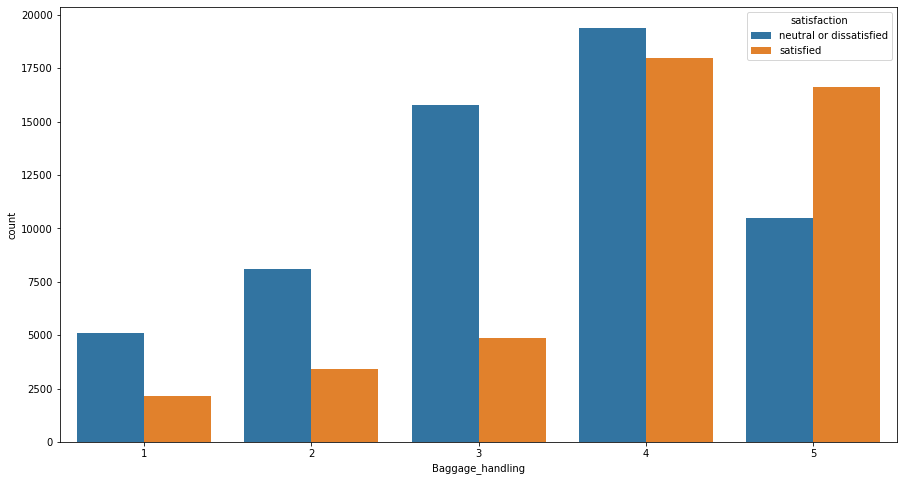

In [104]:
sns.countplot(x='Baggage_handling',hue='satisfaction',data=df)

In [105]:
a12=pd.crosstab(index=df.Baggage_handling,columns=df.satisfaction)
print(a12)
b12=chi2_contingency(a12)
print('p value is:',b12[1])

satisfaction      neutral or dissatisfied  satisfied
Baggage_handling                                    
1                                    5081       2152
2                                    8113       3403
3                                   15759       4862
4                                   19395      17971
5                                   10505      16605
p value is: 0.0


In [106]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [107]:
df.Checkin_service.value_counts()

4    29034
3    28436
5    20608
2    12885
1    12882
0        1
Name: Checkin_service, dtype: int64

<AxesSubplot:title={'center':'Checkin_service'}>

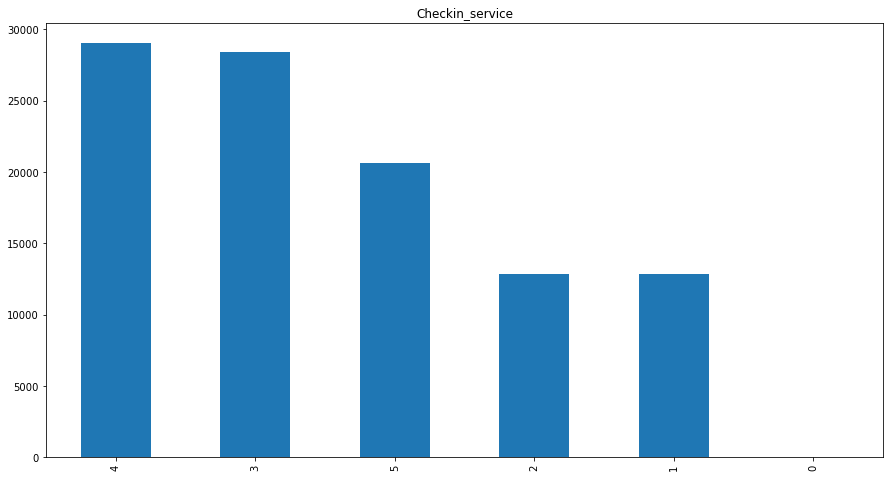

In [108]:
df['Checkin_service'].value_counts().plot(kind='bar',title='Checkin_service')


<AxesSubplot:xlabel='Checkin_service', ylabel='count'>

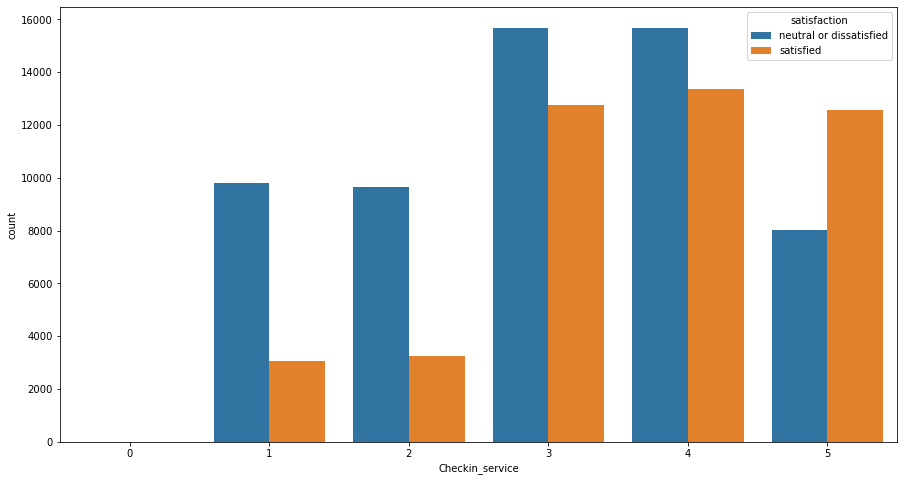

In [109]:
sns.countplot(x='Checkin_service',hue='satisfaction',data=df)

In [110]:
a12=pd.crosstab(index=df.Checkin_service,columns=df.satisfaction)
print(a12)
b12=chi2_contingency(a12)
print('p value is:',b12[1])

satisfaction     neutral or dissatisfied  satisfied
Checkin_service                                    
0                                      1          0
1                                   9803       3079
2                                   9635       3250
3                                  15686      12750
4                                  15685      13349
5                                   8043      12565
p value is: 0.0


In [111]:
df.Inflight_service.value_counts()

4    37932
5    27107
3    20278
2    11448
1     7078
0        3
Name: Inflight_service, dtype: int64

<AxesSubplot:title={'center':'Inflight_service'}>

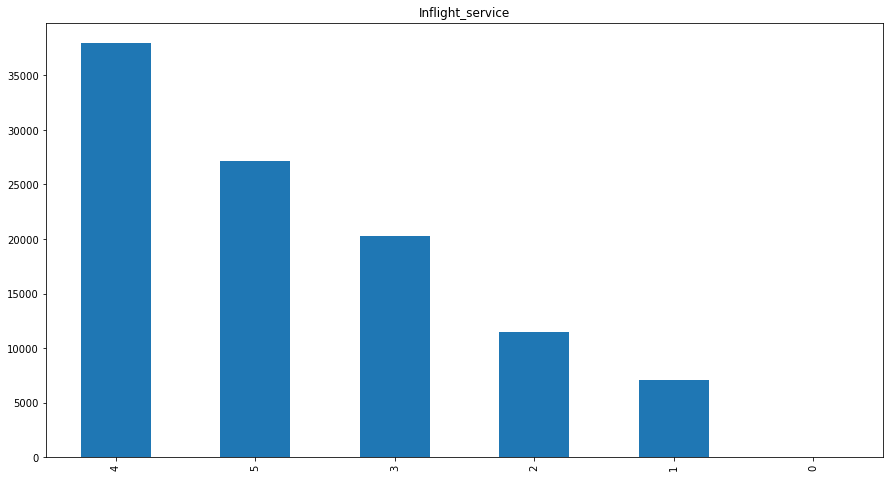

In [112]:
df['Inflight_service'].value_counts().plot(kind='bar',title='Inflight_service')

<AxesSubplot:xlabel='Inflight_service', ylabel='count'>

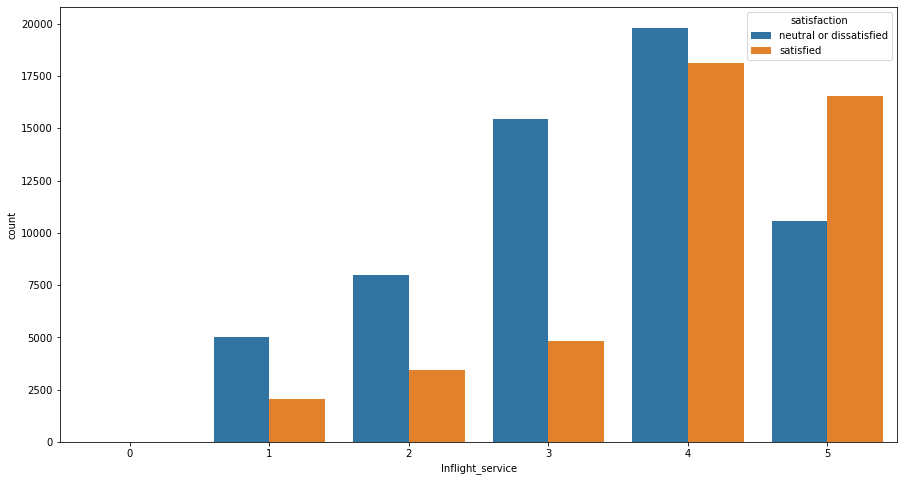

In [113]:
sns.countplot(x='Inflight_service',hue='satisfaction',data=df)

In [114]:
a12=pd.crosstab(index=df.Inflight_service,columns=df.satisfaction)
print(a12)
b12=chi2_contingency(a12)
print('p value is:',b12[1])

satisfaction      neutral or dissatisfied  satisfied
Inflight_service                                    
0                                       3          0
1                                    5027       2051
2                                    7999       3449
3                                   15440       4838
4                                   19809      18123
5                                   10575      16532
p value is: 0.0


In [115]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [116]:
df.Cleanliness.value_counts()

4    27158
3    24564
5    22678
2    16124
1    13310
0       12
Name: Cleanliness, dtype: int64

<AxesSubplot:title={'center':'Cleanliness'}>

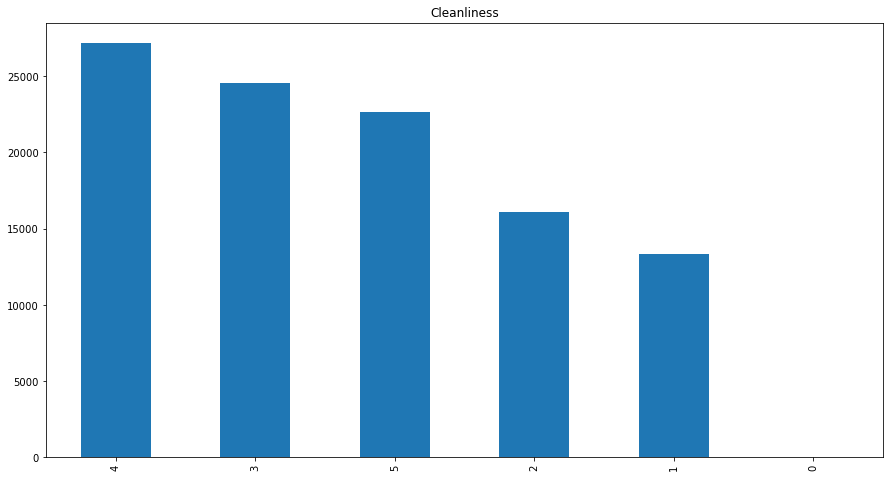

In [117]:
df['Cleanliness'].value_counts().plot(kind='bar',title='Cleanliness')

<AxesSubplot:xlabel='Cleanliness', ylabel='count'>

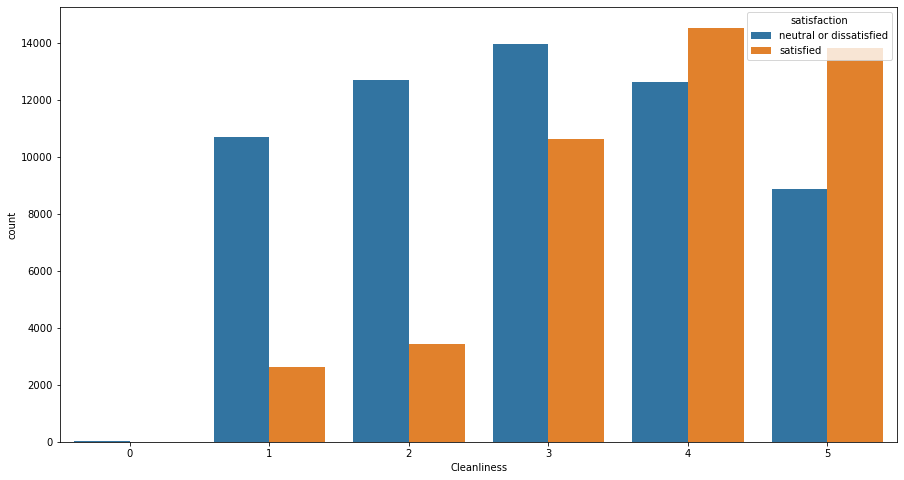

In [118]:
sns.countplot(x='Cleanliness',hue='satisfaction',data=df)

In [119]:
a12=pd.crosstab(index=df.Cleanliness,columns=df.satisfaction)
print(a12)
b12=chi2_contingency(a12)
print('p value is:',b12[1])

satisfaction  neutral or dissatisfied  satisfied
Cleanliness                                     
0                                  12          0
1                               10702       2608
2                               12691       3433
3                               13953      10611
4                               12622      14536
5                                8873      13805
p value is: 0.0


In [120]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [121]:
df.Departure_Delay_in_Minutes.value_counts()

0      58645
1       2947
2       2272
3       2007
4       1850
       ...  
359        1
724        1
297        1
595        1
447        1
Name: Departure_Delay_in_Minutes, Length: 446, dtype: int64

In [122]:
df.Departure_Delay_in_Minutes.describe()

count    103846.000000
mean         14.815795
std          38.237801
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure_Delay_in_Minutes, dtype: float64

In [123]:
df.Departure_Delay_in_Minutes.isna().sum()

0

(array([1.02411e+05, 1.23600e+03, 1.63000e+02, 2.00000e+01, 7.00000e+00,
        5.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([   0. ,  159.2,  318.4,  477.6,  636.8,  796. ,  955.2, 1114.4,
        1273.6, 1432.8, 1592. ]),
 <BarContainer object of 10 artists>)

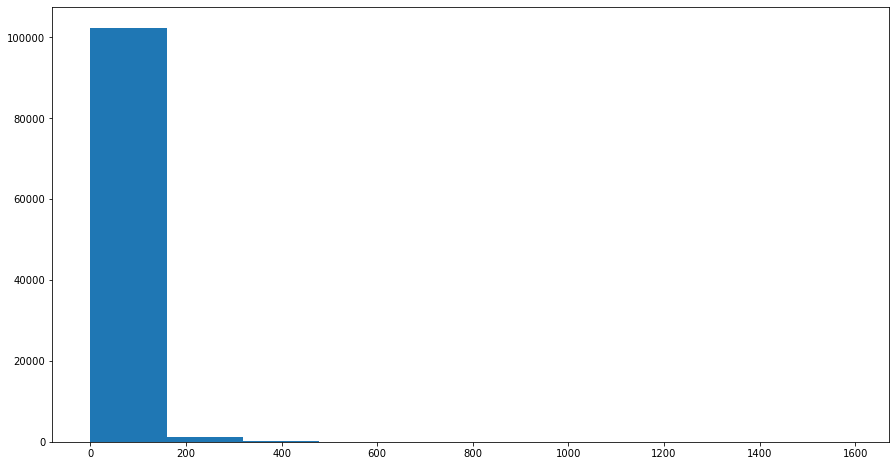

In [124]:
plt.hist(df.Departure_Delay_in_Minutes)

<AxesSubplot:xlabel='Departure_Delay_in_Minutes', ylabel='Density'>

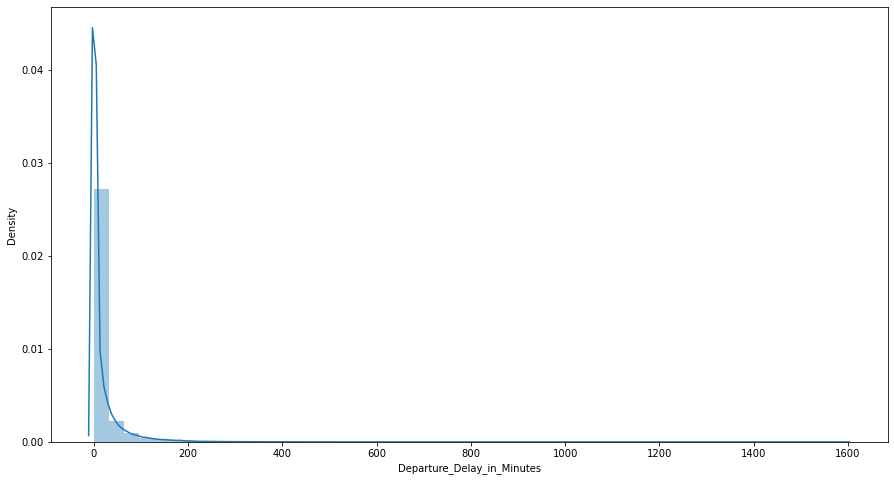

In [125]:
sns.distplot(df.Departure_Delay_in_Minutes)

In [126]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [127]:
df.Arrival_Delay_in_Minutes.isna().sum()

310

In [128]:
df.Arrival_Delay_in_Minutes.describe()

count    103536.000000
mean         15.178479
std          38.702678
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival_Delay_in_Minutes, dtype: float64

In [129]:
df.Arrival_Delay_in_Minutes.median()

0.0

In [130]:
df['Arrival_Delay_in_Minutes'] = df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].median())

In [131]:
df.Arrival_Delay_in_Minutes.isna().sum()

0

(array([1.0234e+05, 1.2870e+03, 1.8200e+02, 2.1000e+01, 7.0000e+00,
        4.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   0. ,  158.4,  316.8,  475.2,  633.6,  792. ,  950.4, 1108.8,
        1267.2, 1425.6, 1584. ]),
 <BarContainer object of 10 artists>)

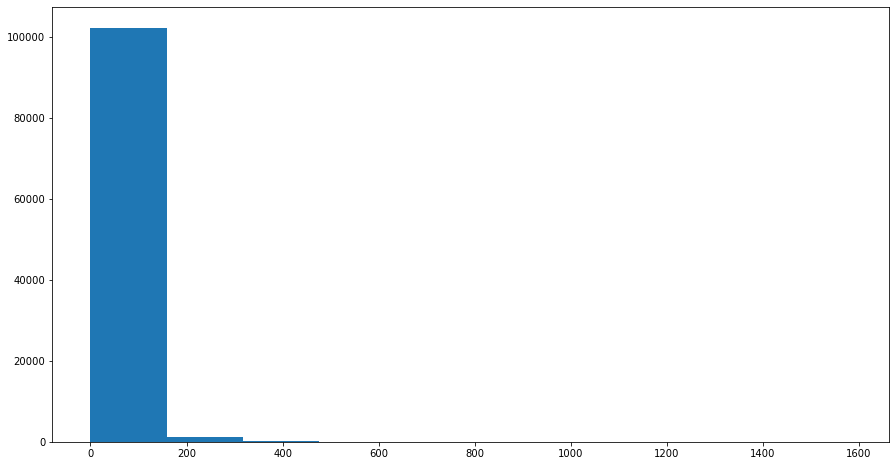

In [132]:
plt.hist(df.Arrival_Delay_in_Minutes)

In [133]:
df

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [134]:
 from sklearn.preprocessing import StandardScaler

In [135]:
std=df[['Flight_Distance','Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes']]

In [136]:
sc=StandardScaler()

In [137]:
st=sc.fit_transform(std)

In [138]:
st

array([[-0.73188512,  0.26633997,  0.07416735],
       [-0.95823677, -0.36131422, -0.23628277],
       [-0.04578811, -0.38746648, -0.39150783],
       ...,
       [ 0.81233616, -0.20440067, -0.02931602],
       [-0.18864115, -0.38746648, -0.39150783],
       [ 0.53870216, -0.38746648, -0.39150783]])

In [139]:
stdd=pd.DataFrame(st,columns=std.columns)

In [140]:
stdd

,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,-0.731885,0.266340,0.074167
1,-0.958237,-0.361314,-0.236283
2,-0.045788,-0.387466,-0.391508
3,-0.629272,-0.099792,-0.158670
4,-0.979363,-0.387466,-0.391508
...,...,...,...
103841,-1.001495,-0.309010,-0.391508
103842,1.166451,-0.387466,-0.391508
103843,0.812336,-0.204401,-0.029316
103844,-0.188641,-0.387466,-0.391508


In [141]:
df.isna().sum()

id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure_Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On_board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [142]:
remain=df[['id','Gender','Customer_Type','Age','Type_of_Travel','Class','Inflight_wifi_service','Departure_Arrival_time_convenient','Ease_of_Online_booking','Gate_location','Food_and_drink','Online_boarding','Seat_comfort','Inflight_entertainment','On_board_service','Leg_room_service','Baggage_handling','Checkin_service','Inflight_service','Cleanliness','satisfaction']]

In [143]:
dff=pd.DataFrame(remain,columns=remain.columns)

In [144]:
dff

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,3,4,3,1,...,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,3,2,3,3,...,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,2,2,2,2,...,5,5,5,4,3,4,4,4,5,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,2,5,5,5,...,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,3,3,3,3,...,5,5,3,3,4,4,3,3,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,2,1,2,3,...,2,2,2,3,1,4,2,3,2,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,4,4,4,4,...,4,5,5,5,5,5,5,5,4,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1,1,1,3,...,1,5,4,3,2,4,5,5,4,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1,1,1,5,...,1,1,1,4,5,1,5,4,1,neutral or dissatisfied


In [145]:
fd= pd.concat([stdd,dff],axis=1)


In [146]:
fd

,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Inflight_wifi_service,...,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction
0,-0.731885,0.266340,0.074167,70172.0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,3.0,...,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,neutral or dissatisfied
1,-0.958237,-0.361314,-0.236283,5047.0,Male,disloyal Customer,25.0,Business travel,Business,3.0,...,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,neutral or dissatisfied
2,-0.045788,-0.387466,-0.391508,110028.0,Female,Loyal Customer,26.0,Business travel,Business,2.0,...,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,satisfied
3,-0.629272,-0.099792,-0.158670,24026.0,Female,Loyal Customer,25.0,Business travel,Business,2.0,...,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,neutral or dissatisfied
4,-0.979363,-0.387466,-0.391508,119299.0,Male,Loyal Customer,61.0,Business travel,Business,3.0,...,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,NaN,NaN,NaN,94171.0,Female,disloyal Customer,23.0,Business travel,Eco,2.0,...,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,neutral or dissatisfied
103900,NaN,NaN,NaN,73097.0,Male,Loyal Customer,49.0,Business travel,Business,4.0,...,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,satisfied
103901,NaN,NaN,NaN,68825.0,Male,disloyal Customer,30.0,Business travel,Business,1.0,...,1.0,5.0,4.0,3.0,2.0,4.0,5.0,5.0,4.0,neutral or dissatisfied
103902,NaN,NaN,NaN,54173.0,Female,disloyal Customer,22.0,Business travel,Eco,1.0,...,1.0,1.0,1.0,4.0,5.0,1.0,5.0,4.0,1.0,neutral or dissatisfied


In [147]:
fd.isna().sum()

Flight_Distance                      58
Departure_Delay_in_Minutes           58
Arrival_Delay_in_Minutes             58
id                                   58
Gender                               58
Customer_Type                        58
Age                                  58
Type_of_Travel                       58
Class                                58
Inflight_wifi_service                58
Departure_Arrival_time_convenient    58
Ease_of_Online_booking               58
Gate_location                        58
Food_and_drink                       58
Online_boarding                      58
Seat_comfort                         58
Inflight_entertainment               58
On_board_service                     58
Leg_room_service                     58
Baggage_handling                     58
Checkin_service                      58
Inflight_service                     58
Cleanliness                          58
satisfaction                         58
dtype: int64

In [148]:
fd = fd.dropna()

In [149]:
fd

,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Inflight_wifi_service,...,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction
0,-0.731885,0.266340,0.074167,70172.0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,3.0,...,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,neutral or dissatisfied
1,-0.958237,-0.361314,-0.236283,5047.0,Male,disloyal Customer,25.0,Business travel,Business,3.0,...,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,neutral or dissatisfied
2,-0.045788,-0.387466,-0.391508,110028.0,Female,Loyal Customer,26.0,Business travel,Business,2.0,...,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,satisfied
3,-0.629272,-0.099792,-0.158670,24026.0,Female,Loyal Customer,25.0,Business travel,Business,2.0,...,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,neutral or dissatisfied
4,-0.979363,-0.387466,-0.391508,119299.0,Male,Loyal Customer,61.0,Business travel,Business,3.0,...,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103841,-1.001495,-0.309010,-0.391508,80060.0,Female,Loyal Customer,28.0,Personal Travel,Eco,2.0,...,2.0,3.0,3.0,3.0,4.0,3.0,2.0,3.0,3.0,neutral or dissatisfied
103842,1.166451,-0.387466,-0.391508,31913.0,Female,Loyal Customer,52.0,Business travel,Business,3.0,...,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,satisfied
103843,0.812336,-0.204401,-0.029316,89597.0,Female,Loyal Customer,42.0,Business travel,Business,5.0,...,5.0,5.0,3.0,5.0,4.0,5.0,5.0,3.0,5.0,satisfied
103844,-0.188641,-0.387466,-0.391508,40682.0,Female,Loyal Customer,50.0,Business travel,Business,4.0,...,5.0,2.0,5.0,5.0,5.0,5.0,3.0,5.0,3.0,satisfied


In [150]:
fd.isna().sum()

Flight_Distance                      0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Inflight_wifi_service                0
Departure_Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On_board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
satisfaction                         0
dtype: int64

In [151]:
fd.drop('id',axis=1,inplace = True)

In [152]:
fd

,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender,Customer_Type,Age,Type_of_Travel,Class,Inflight_wifi_service,Departure_Arrival_time_convenient,...,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction
0,-0.731885,0.266340,0.074167,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,3.0,4.0,...,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,neutral or dissatisfied
1,-0.958237,-0.361314,-0.236283,Male,disloyal Customer,25.0,Business travel,Business,3.0,2.0,...,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,neutral or dissatisfied
2,-0.045788,-0.387466,-0.391508,Female,Loyal Customer,26.0,Business travel,Business,2.0,2.0,...,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,satisfied
3,-0.629272,-0.099792,-0.158670,Female,Loyal Customer,25.0,Business travel,Business,2.0,5.0,...,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,neutral or dissatisfied
4,-0.979363,-0.387466,-0.391508,Male,Loyal Customer,61.0,Business travel,Business,3.0,3.0,...,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103841,-1.001495,-0.309010,-0.391508,Female,Loyal Customer,28.0,Personal Travel,Eco,2.0,3.0,...,2.0,3.0,3.0,3.0,4.0,3.0,2.0,3.0,3.0,neutral or dissatisfied
103842,1.166451,-0.387466,-0.391508,Female,Loyal Customer,52.0,Business travel,Business,3.0,3.0,...,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,satisfied
103843,0.812336,-0.204401,-0.029316,Female,Loyal Customer,42.0,Business travel,Business,5.0,5.0,...,5.0,5.0,3.0,5.0,4.0,5.0,5.0,3.0,5.0,satisfied
103844,-0.188641,-0.387466,-0.391508,Female,Loyal Customer,50.0,Business travel,Business,4.0,4.0,...,5.0,2.0,5.0,5.0,5.0,5.0,3.0,5.0,3.0,satisfied


In [153]:
categorical=fd.select_dtypes(include=object)
print(len(categorical.columns))
categorical.columns

5


Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'satisfaction'], dtype='object')

In [154]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [155]:
for i in categorical:
    fd[i]=le.fit_transform(fd[i])

In [156]:
fd

,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender,Customer_Type,Age,Type_of_Travel,Class,Inflight_wifi_service,Departure_Arrival_time_convenient,...,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction
0,-0.731885,0.266340,0.074167,1,0,13.0,1,2,3.0,4.0,...,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,0
1,-0.958237,-0.361314,-0.236283,1,1,25.0,0,0,3.0,2.0,...,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,0
2,-0.045788,-0.387466,-0.391508,0,0,26.0,0,0,2.0,2.0,...,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,1
3,-0.629272,-0.099792,-0.158670,0,0,25.0,0,0,2.0,5.0,...,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,0
4,-0.979363,-0.387466,-0.391508,1,0,61.0,0,0,3.0,3.0,...,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103841,-1.001495,-0.309010,-0.391508,0,0,28.0,1,1,2.0,3.0,...,2.0,3.0,3.0,3.0,4.0,3.0,2.0,3.0,3.0,0
103842,1.166451,-0.387466,-0.391508,0,0,52.0,0,0,3.0,3.0,...,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,1
103843,0.812336,-0.204401,-0.029316,0,0,42.0,0,0,5.0,5.0,...,5.0,5.0,3.0,5.0,4.0,5.0,5.0,3.0,5.0,1
103844,-0.188641,-0.387466,-0.391508,0,0,50.0,0,0,4.0,4.0,...,5.0,2.0,5.0,5.0,5.0,5.0,3.0,5.0,3.0,1


In [157]:
corr=stdd.corr()
corr

,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Flight_Distance,1.000000,0.002212,-0.002470
Departure_Delay_in_Minutes,0.002212,1.000000,0.960296
Arrival_Delay_in_Minutes,-0.002470,0.960296,1.000000


In [158]:
m=ols('Arrival_Delay_in_Minutes ~ satisfaction',data=df).fit()
an=sm.stats.anova_lm(m)
print(an)

t=pairwise_tukeyhsd(df.Arrival_Delay_in_Minutes,df.satisfaction,alpha=0.05)
print(t)

                    df        sum_sq        mean_sq           F        PR(>F)
satisfaction       1.0  5.117755e+05  511775.486036  343.658561  1.355309e-76
Residual      103844.0  1.546442e+08    1489.197546         NaN           NaN
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
         group1           group2  meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------------
neutral or dissatisfied satisfied    -4.48 0.001 -4.9537 -4.0063   True
-----------------------------------------------------------------------


In [159]:
# departure delay and arrival delay are strongly corelated so I decide to remove one variable
fd.drop('Departure_Delay_in_Minutes',axis=1,inplace = True)

In [161]:
x= fd.drop(columns='satisfaction')
y= fd['satisfaction']

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 45)

# LOGISTIC REGRESSION

In [162]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [163]:
logreg = LogisticRegression()

In [164]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.376183
         Iterations 7
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.450     
Dependent Variable:        satisfaction          AIC:                   78128.5807
Date:                      2022-03-30 14:23      BIC:                   78329.1330
No. Observations:          103788                Log-Likelihood:        -39043.   
Df Model:                  20                    LL-Null:               -71013.   
Df Residuals:              103767                LLR p-value:           0.0000    
Converged:                 1.0000                Scale:                 1.0000    
No. Iterations:            7.0000                                                 
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------

In [167]:
logreg = LogisticRegression(solver= 'sag')
logreg.fit(x, y)

LogisticRegression(solver='sag')

In [169]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [171]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[16057  1682]
 [ 2167 11231]]


In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     17739
           1       0.87      0.84      0.85     13398

    accuracy                           0.88     31137
   macro avg       0.88      0.87      0.87     31137
weighted avg       0.88      0.88      0.88     31137



In [173]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

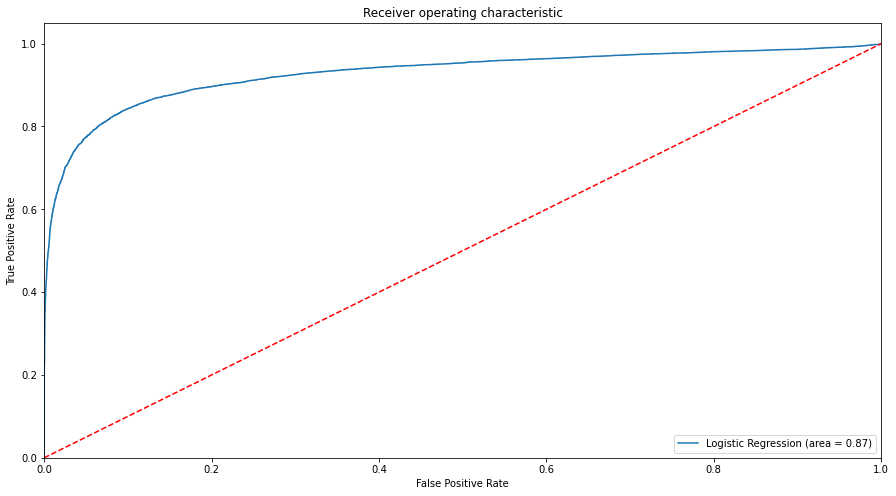

In [175]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# DECISION TREE 

In [176]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=40)
tree.fit(x_train,y_train)
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

In [177]:
from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_train,y_train_pred), 2)) 
print(round(accuracy_score(y_test,y_test_pred), 2))


1.0
0.94


In [178]:
# Tree is overfitting so I am using cost complexity pruning(CCP)

In [179]:
path = tree.cost_complexity_pruning_path(x_train, y_train)
alphas = path['ccp_alphas']
alphas

array([0.00000000e+00, 6.74457337e-06, 6.83893334e-06, ...,
       2.69279327e-02, 6.31714468e-02, 1.65550500e-01])

In [180]:
accuracy_train, accuracy_test = [],[]
for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    
    tree.fit(x_train, y_train)
    y_train_pred=tree.predict(x_train)
    y_test_pred=tree.predict(x_test)
    
    print(accuracy_train.append(accuracy_score(y_train, y_train_pred)))
    print(accuracy_test.append(accuracy_score(y_test,y_test_pred)))
    

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


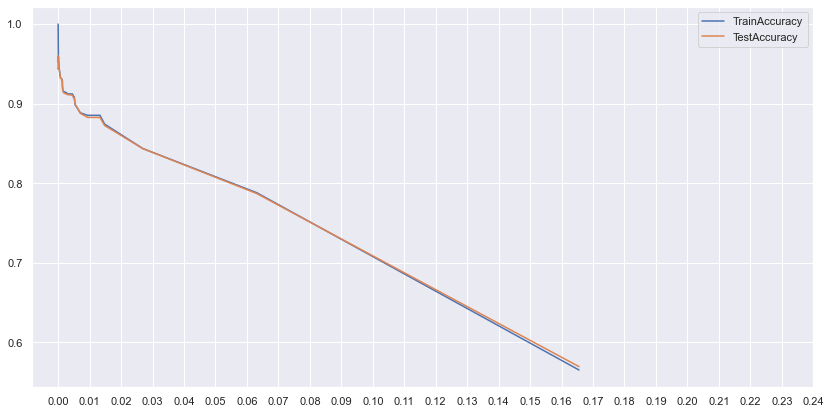

In [181]:
sns.set()
plt.figure(figsize = (14,7))
sns.lineplot(y=accuracy_train, x = alphas, label = 'TrainAccuracy')
sns.lineplot(y=accuracy_test, x = alphas, label = 'TestAccuracy')
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [208]:
tree = DecisionTreeClassifier(ccp_alpha=0.01,random_state=40)
a=tree.fit(x_train,y_train)
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_train,y_train_pred), 2)) 
print(round(accuracy_score(y_test,y_test_pred), 2)) 

0.89
0.88


In [210]:
from sklearn import tree

[Text(354.11538461538464, 380.52, 'X[12] <= 3.5\ngini = 0.491\nsamples = 72651\nvalue = [41080, 31571]'),
 Text(128.76923076923077, 271.8, 'X[7] <= 0.5\ngini = 0.253\nsamples = 36529\nvalue = [31106, 5423]'),
 Text(64.38461538461539, 163.07999999999998, 'gini = 0.008\nsamples = 1248\nvalue = [5, 1243]'),
 Text(193.15384615384616, 163.07999999999998, 'X[7] <= 3.5\ngini = 0.209\nsamples = 35281\nvalue = [31101, 4180]'),
 Text(128.76923076923077, 54.360000000000014, 'gini = 0.119\nsamples = 31997\nvalue = [29956, 2041]'),
 Text(257.53846153846155, 54.360000000000014, 'gini = 0.454\nsamples = 3284\nvalue = [1145, 2139]'),
 Text(579.4615384615385, 271.8, 'X[5] <= 0.5\ngini = 0.4\nsamples = 36122\nvalue = [9974, 26148]'),
 Text(450.69230769230774, 163.07999999999998, 'X[14] <= 3.5\ngini = 0.253\nsamples = 28739\nvalue = [4264, 24475]'),
 Text(386.3076923076923, 54.360000000000014, 'gini = 0.47\nsamples = 7000\nvalue = [2638, 4362]'),
 Text(515.0769230769231, 54.360000000000014, 'gini = 0.138

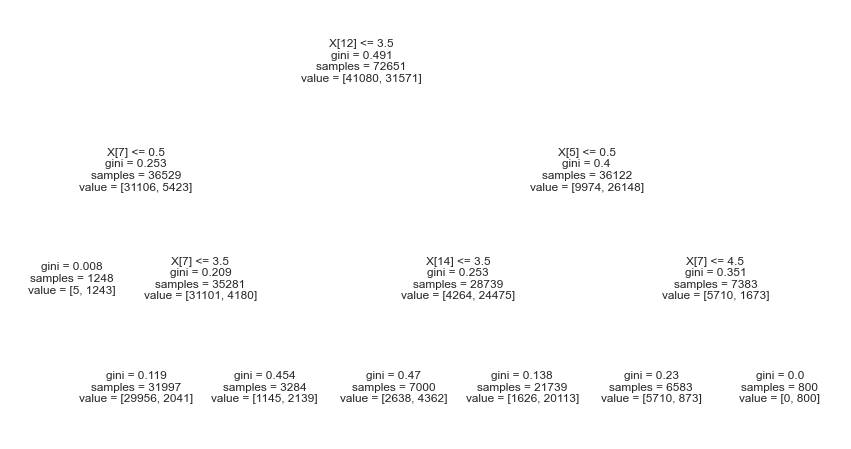

In [211]:
tree.plot_tree(a)

# ENSEMBLE TECHNIQUES

# Bagging Technique (RANDOM FOREST CLASSIFIER) with GRID SEARCH as   hyperparameter tuning

In [188]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [189]:
rfc=RandomForestClassifier(random_state=42)


In [190]:
param_grid = { 'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}

In [191]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [192]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [193]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')

In [194]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500, random_state=42)

In [195]:
y_predrfc=rfc1.predict(x_test)

In [196]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,y_predrfc))

Accuracy for Random Forest on CV data:  0.9381764460288403


In [201]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_predrfc)
print(confusion_matrix)

[[16897   842]
 [ 1083 12315]]


In [203]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predrfc))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     17739
           1       0.94      0.92      0.93     13398

    accuracy                           0.94     31137
   macro avg       0.94      0.94      0.94     31137
weighted avg       0.94      0.94      0.94     31137



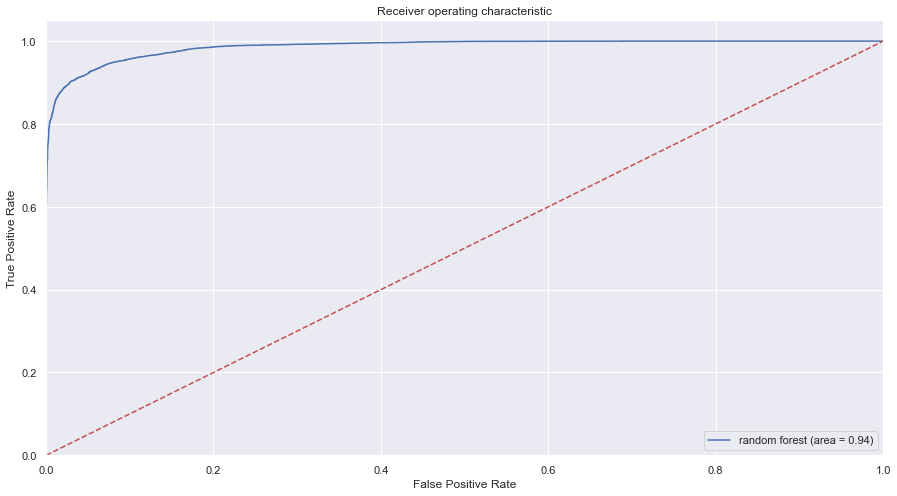

In [204]:
ranfor_roc_auc = roc_auc_score(y_test, rfc1.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc1.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='random forest (area = %0.2f)' % ranfor_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ranfor_ROC')
plt.show()

# Boosting Techniques

# ADABOOST

In [197]:
from sklearn.ensemble import AdaBoostClassifier


In [198]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model = abc.fit(x_train, y_train)

In [199]:
y_predabc = abc.predict(x_test)


In [175]:
from sklearn.metrics import accuracy_score


In [200]:

print(round(accuracy_score(y_test,y_predabc), 2))

0.93


In [205]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_predabc)
print(confusion_matrix)

[[16708  1031]
 [ 1197 12201]]


In [206]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predabc))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     17739
           1       0.92      0.91      0.92     13398

    accuracy                           0.93     31137
   macro avg       0.93      0.93      0.93     31137
weighted avg       0.93      0.93      0.93     31137



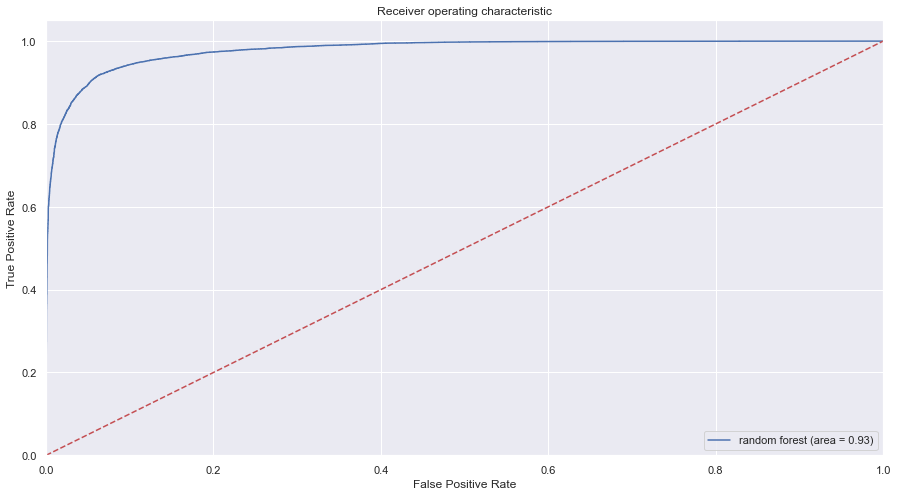

In [207]:
abc_roc_auc = roc_auc_score(y_test, abc.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, abc.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='random forest (area = %0.2f)' % abc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ABC_ROC')
plt.show()

# Gradient Boosting

In [212]:
from sklearn.ensemble import GradientBoostingClassifier

In [213]:
gradB = GradientBoostingClassifier(n_estimators=50, learning_rate=1)
model1 = gradB.fit(x_train, y_train)

In [217]:
y_predgradB=gradB.predict(x_test)

In [214]:
print('the accuracy score of train:',gradB.score(x_train,y_train))

the accuracy score of train: 0.9567383793753699


In [176]:
print("Accuracy for Gradient boosting to test data: ",accuracy_score(y_test,y_predgradB))

NameError: name 'y_predgradB' is not defined

In [220]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_predgradB)
print(confusion_matrix)

[[17214   525]
 [  851 12547]]


In [221]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predgradB))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     17739
           1       0.96      0.94      0.95     13398

    accuracy                           0.96     31137
   macro avg       0.96      0.95      0.95     31137
weighted avg       0.96      0.96      0.96     31137



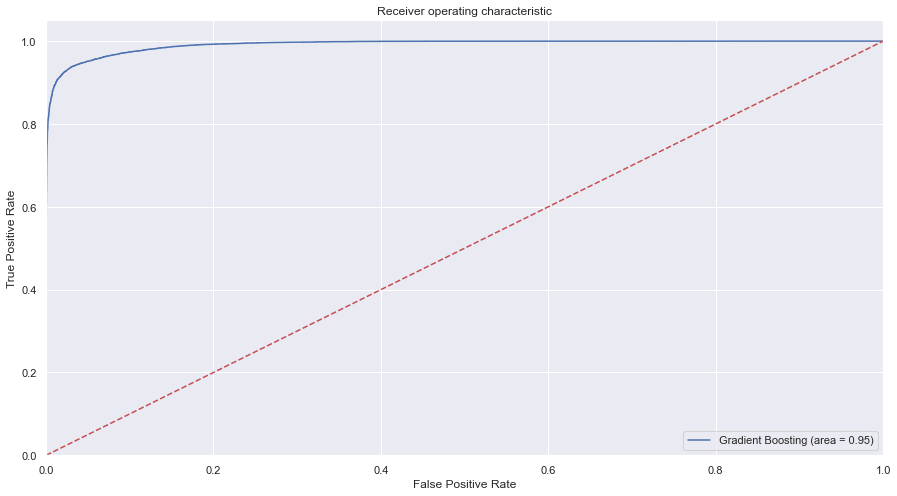

In [222]:
GradB_roc_auc = roc_auc_score(y_test, gradB.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, gradB.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % GradB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GradB_ROC')
plt.show()

# Xtreme Gradient Boosting 

In [227]:
!pip install xgboost

  Using cached xgboost-1.5.2-py3-none-win_amd64.whl (106.6 MB)


In [170]:
from xgboost import XGBClassifier


In [171]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(x_train,y_train)

[20:23:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [172]:
y_predxgb=xgb.predict(x_test)

In [173]:
print('the accuracy score of train:',xgb.score(x_train,y_train))

the accuracy score of train: 0.977206094892018


In [177]:
print("Accuracy for XG boost to test data: ",accuracy_score(y_test,y_predxgb))

Accuracy for XG boost to test data:  0.9621350804509105


In [244]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_predxgb)
print(confusion_matrix)

[[17354   385]
 [  794 12604]]


In [245]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predxgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17739
           1       0.97      0.94      0.96     13398

    accuracy                           0.96     31137
   macro avg       0.96      0.96      0.96     31137
weighted avg       0.96      0.96      0.96     31137



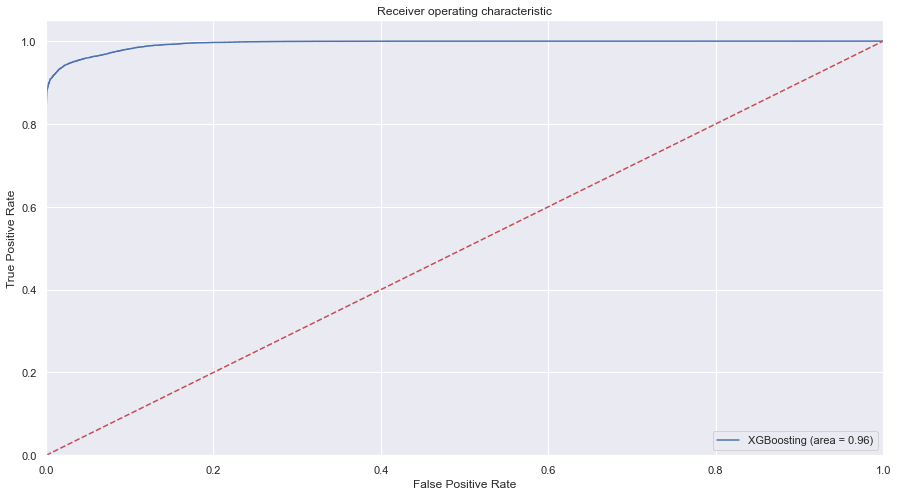

In [246]:
XGB_roc_auc = roc_auc_score(y_test, xgb.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoosting (area = %0.2f)' % XGB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_roc_auc')
plt.show()

# K-Nearest Neighbour Classifier Using Grid Search
# Because I want to know best  K-value 

In [235]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [236]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [237]:
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 56.6min finished


In [238]:
print(grid_search.best_params_)

{'n_neighbors': 7}


In [239]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) ) 

Accuracy for our training dataset with tuning is : 90.60%


In [240]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [241]:
y_predKNN=knn.predict(x_test)

In [242]:
print('the accuracy score of train:',knn.score(x_train,y_train))

the accuracy score of train: 0.9271861364606131


In [243]:
print("Accuracy for KNN to test data: ",accuracy_score(y_test,y_predKNN))

Accuracy for KNN to test data:  0.9074413077688923


In [247]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_predKNN)
print(confusion_matrix)

[[16758   981]
 [ 1901 11497]]


In [248]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predKNN))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     17739
           1       0.92      0.86      0.89     13398

    accuracy                           0.91     31137
   macro avg       0.91      0.90      0.90     31137
weighted avg       0.91      0.91      0.91     31137



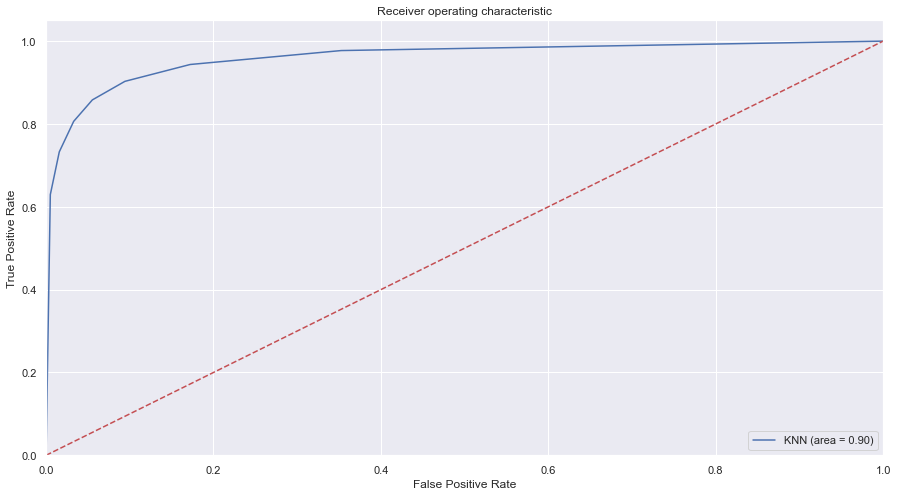

In [250]:
KNN_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_roc_auc')
plt.show()

In [165]:
acc_scores={'Algorithms':['Logistic Regression','Decision Tree Classifier','Random Forest GridsearchCV','AdaBoosting','GradientBoosting','XGBoost','K-nearest Neighbour GridsearchCV']
           ,'Performance':['88%','88%','94%','93%','95.5%','96%','91%']}

In [166]:
scores=pd.DataFrame(acc_scores,columns=['Algorithms','Performance'])

In [167]:
scores

,Algorithms,Performance
0,Logistic Regression,88%
1,Decision Tree Classifier,88%
2,Random Forest GridsearchCV,94%
3,AdaBoosting,93%
4,GradientBoosting,95.5%
5,XGBoost,96%
6,K-nearest Neighbour GridsearchCV,91%
